![CARCASSONNE](Logo.png)

# PROJET STID 2020-2021
### LES ÉTABLISSEMENTS LES PLUS CONVOITÉS SELON RÉGION ET FILIÈRE DE FORMATION EN 2019

@author: **Jéros VIGAN**


## =============================================================================
##  IMPORTATION DES MODULES 
## =============================================================================

In [2]:
import pandas as pd
import pandas.plotting
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from collections import Counter
import time

from scipy.stats import norm
from statsmodels.stats.proportion import proportion_confint
import scipy
import statsmodels
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
import scipy.stats as stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

### ===============================================================
###  Declaration du dossier de travail
### ===============================================================

In [4]:
import os
base= r'C:\Users\Jéros\01_TraitementFichier\projetSTID'
base=base.replace('\\','/')
os.chdir(base)
os.getcwd()

'C:\\Users\\Jéros\\01_TraitementFichier\\projetSTID'

In [5]:
for file in os.listdir():
    print('ce dossier contient :', file)

ce dossier contient : functions.py
ce dossier contient : function_biplot.py
ce dossier contient : parcousup-2018.csv
ce dossier contient : parcousup-2019.csv
ce dossier contient : __pycache__


### ===============================================================
### importation des  données 
### ===============================================================

In [6]:
Dataset2019=pd.read_csv("parcousup-2019.csv",sep=";",encoding='ISO-8859-1')

In [7]:
Dataset2019.sample(5)

Session  \
2297      2019   
948       2019   
10087     2019   
10360     2019   
552       2019   

      Statut de létablissement de la filière de formation (public, privé
)  \
2297                                              Public                      
948                                               Public                      
10087                                             Public                      
10360                                             Public                      
552                                                Privé                      

      Code UAI de l'établissement  \
2297                     0134260K   
948                      0670085D   
10087                    0430951A   
10360                    0601910A   
552                      0431000D   

                                     Établissement  \
2297                                    IFSI CGD13   
948                         Lycée Louis Couffignal   
10087  I.U.T. de Clermont-Ferrand - Antenne du Puy   
10360    Université d'Amiens - Antenne de Beauvais   
552                                           ISVT   

      Code départemental de létablissement Département de létablissement  \
2297                                     13               Bouches-du-Rhône   
948                                      67                       Bas-Rhin   
10087                                    43                    Haute-Loire   
10360                                    60                           Oise   
552                                      43                    Haute-Loire   

        Région de létablissement Académie de létablissement  \
2297   Provence Alpes Côte d'Azur               Aix-Marseille   
948                     Grand Est                  Strasbourg   
10087        Auvergne-Rhône-Alpes            Clermont-Ferrand   
10360             Hauts-de-France                      Amiens   
552          Auvergne-Rhône-Alpes            Clermont-Ferrand   

      Filière de formation très agrégée  \
2297                               IFSI   
948                                 BTS   
10087                               DUT   
10360                           Licence   
552                                 BTS   

                            Filière de formation  \
2297                       D.E secteur sanitaire   
948                             BTS - Production   
10087                           DUT - Production   
10360  Licence - Sciences - technologies - santé   
552                                         BTSA   

      Concours communs et banques d'épreuves  \
2297                                     NaN   
948                                      NaN   
10087                                    NaN   
10360                                    NaN   
552                                      NaN   

          Filière de formation détaillée Filière de formation très détaillée  \
2297                       D.E Infirmier   IFSI CGD13 - rentrée en septembre   
948    Développement et Réalisation Bois                                 NaN   
10087                             Chimie                                 NaN   
10360                             Chimie   Licence Chimie (Portail Sciences)   
552         Gestion et maitrise de l'eau                                 NaN   

       Lien de la formation sur la plateforme Parcoursup  \
2297   https://dossier.parcoursup.fr/Candidat/carte?g...   
948    https://dossier.parcoursup.fr/Candidat/carte?g...   
10087  https://dossier.parcoursup.fr/Candidat/carte?g...   
10360  https://dossier.parcoursup.fr/Candidat/carte?g...   
552    https://dossier.parcoursup.fr/Candidat/carte?g...   

      Coordonnées GPS de la formation  \
2297                   43.3104,5.4105   
948                 48.5618,7.7492598   
10087                    45.04,3.8815   
10360                  49.4313,2.0895   
552                    45.0334,3.8794   

       Capacité de létablissement par formation  \
2297         

In [8]:
df=Dataset2019.copy()
print(df.columns)

Index(['Session',
       'Statut de létablissement de la filière de formation (public, privé)',
       'Code UAI de l'établissement', 'Établissement',
       'Code départemental de létablissement',
       'Département de létablissement', 'Région de létablissement',
       'Académie de létablissement', 'Filière de formation très agrégée',
       'Filière de formation', 'Concours communs et banques d'épreuves',
       'Filière de formation détaillée', 'Filière de formation très détaillée',
       'Lien de la formation sur la plateforme Parcoursup',
       'Coordonnées GPS de la formation',
       'Capacité de létablissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale',
       'Dont effectif des candidats ayant postulé en internat',
       'Effectif des candidats néo bacheliers généraux en phase principale',
       'Dont effectif des candi

In [9]:
def dataset_info(dataset):
    print(' ● taille:', dataset.shape)
    print('-------------------------')
    time.sleep(1)
    print(' ● types de données:\n', dataset.dtypes.value_counts())
    print('-------------------------')
    time.sleep(2)
    print(' ● valeurs manquantes:', sum(pd.DataFrame(dataset).isnull().sum(axis=1).tolist()))
    print('-------------------------')
    time.sleep(2)
    print(' ● nombre de valeurs:', dataset.shape[0]*dataset.shape[1])

In [10]:
dataset_info(df)

 ● taille: (11577, 92)
-------------------------
 ● types de données:
 int64      46
float64    31
object     15
dtype: int64
-------------------------
 ● valeurs manquantes: 88623
-------------------------
 ● nombre de valeurs: 1065084


<AxesSubplot:ylabel='None'>

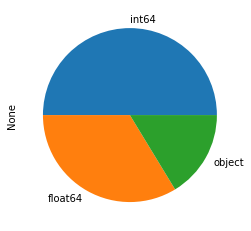

In [11]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

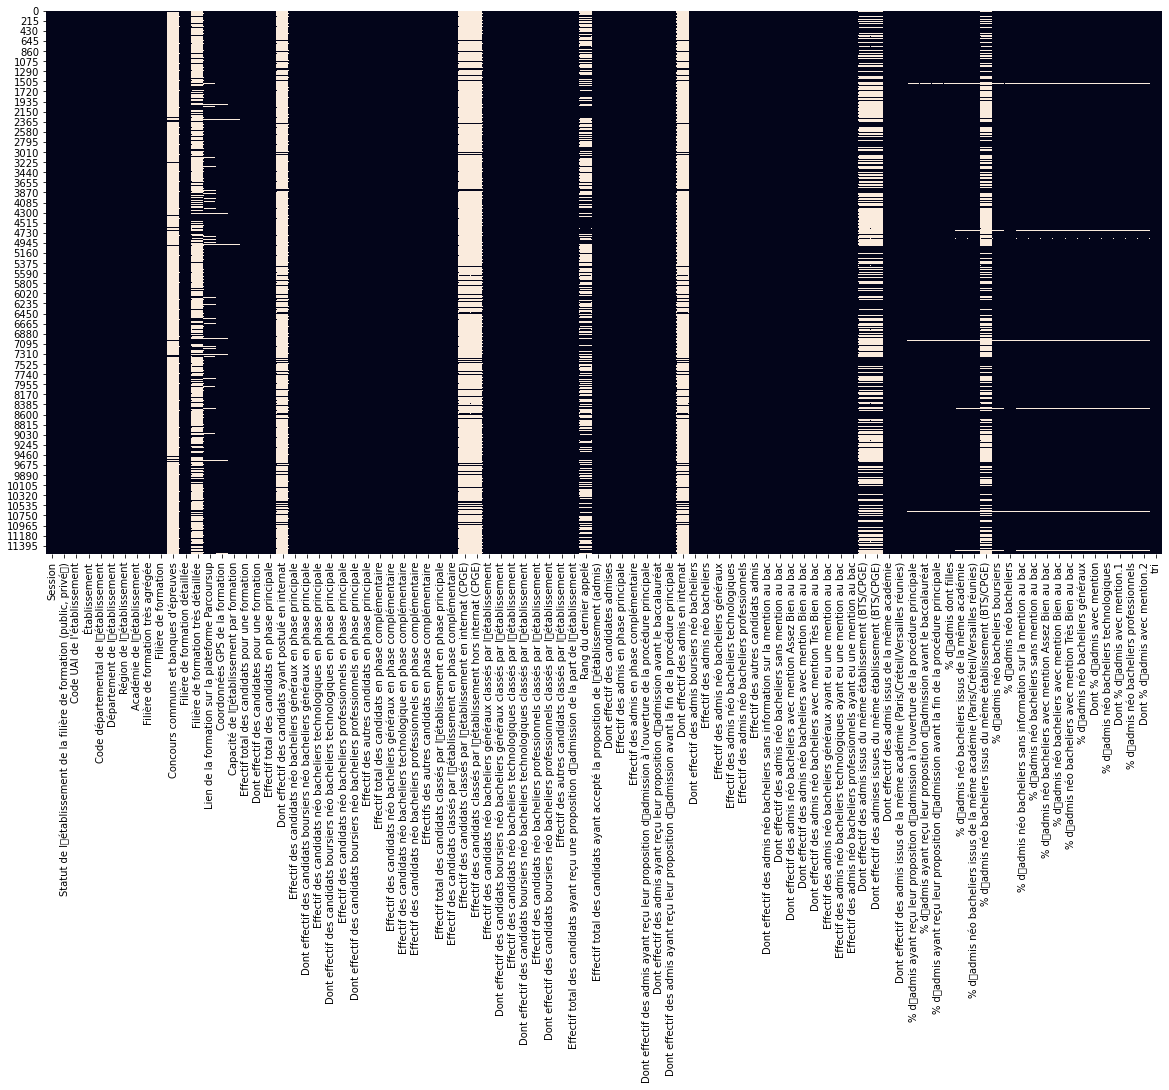

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## Suppression des variables ayant des valeurs manquantes

In [13]:
def val_manquant(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return  missing_data

In [14]:
val_manquant(df)

Total   Percent
Concours communs et banques d'épreuves              11226  0.969681
Effectif des candidats classés par létablissem...  10728  0.926665
Effectif des candidats classés par létablissem...  10728  0.926665
Dont effectif des admis en internat                 10728  0.926665
Dont effectif des candidats ayant postulé en in...  10728  0.926665
Filière de formation très détaillée                  8711  0.752440
Rang du dernier appelé                               5937  0.512827
% dadmis néo bacheliers issus du même établiss...   5625  0.485877
Dont effectif des admis issus du même établisse...   5619  0.485359
Dont effectif des admises issues du même établi...   5619  0.485359
Lien de la formation sur la plateforme Parcoursup     624  0.053900
Coordonnées GPS de la formation                       172  0.014857
% dadmis néo bacheliers technologiques               136  0.011747
Dont % dadmis avec mention.2                         136  0.011747
% dadmis néo bacheliers professionnels               136  0.011747
Dont % dadmis avec mention.1                         136  0.011747
% dadmis néo bacheliers généraux                     136  0.011747
Dont % dadmis avec mention                           136  0.011747
% dadmis néo bacheliers issus de la même académie    136  0.011747
% dadmis néo bacheliers issus de la même acadé...    136  0.011747
% dadmis néo bacheliers avec mention Très Bien...    136  0.011747
% dadmis néo bacheliers avec mention Bien au bac     136  0.011747
% dadmis néo bacheliers avec mention Assez Bie...    136  0.011747
% dadmis néo bacheliers sans mention au bac          136  0.011747
% dadmis néo bacheliers sans information sur l...    136  0.011747
% dadmis néo bacheliers boursiers                    136  0.011747
% dadmis ayant reçu leur proposition dadmissi...     51  0.004405
% dadmis néo bacheliers                               51  0.004405
% dadmis ayant reçu leur proposition dadmissi...     51  0.004405
% dadmis dont filles                                  51  0.004405
% dadmis ayant reçu leur proposition dadmissi...     51  0.004405
Capacité de létablissement par formation              19  0.001641
Effectif des candidats néo bacheliers technolog...      0  0.000000
Dont effectif des candidats boursiers néo bache...      0  0.000000
Dont effectif des candidats boursiers néo bache...      0  0.000000
Effectif des candidats néo bacheliers professio...      0  0.000000
Effectif des autres candidats en phase principale       0  0.000000
Effectif total des candidats en phase complémen...      0  0.000000
Effectif des candidats néo bacheliers généraux ...      0  0.000000
Effectif des candidats néo bacheliers technolog...      0  0.000000
Effectif des candidats néo bacheliers professio...      0  0.000000
Dont effectif des candidats boursiers néo bache...      0  0.000000
tri                                                     0  0.000000
Académie de létablissement                             0  0.000000
Effectif des candidats néo bacheliers généraux ...      0  0.000000
Effectif total des candidats en phase principale        0  0.000000
Dont effectif des candidates pour une formation         0  0.000000
Effectif total des candidats pour une formation         0  0.000000
Filière de formation détaillée                          0  0.000000
Filière de formation                                    0  0.000000
Filière de formation très agrégée                       0  0.000000
Effectif total des candidats classés par létab...      0  0.000000
Région de létablissement                               0  0.000000
Département de létablissement                          0  0.000000
Code départemental de létablissement                   0  0.000000
Établissement                                           0  0.000000
Code UAI de l'établissement                             0  0.000000
Statut de létablissement de la filière de form...      0  0.000000
Effectifs des autres candidats en phase 

In [15]:
df[df.columns[df.isna().sum()/df.shape[0]>0.9]]

Concours communs et banques d'épreuves  \
0              La Prépa des INP - Groupe INP   
1                    Concours Geipi Polytech   
2                    Concours Geipi Polytech   
3                    Concours Geipi Polytech   
4                    Concours Geipi Polytech   
...                                      ...   
11572                                    NaN   
11573                                    NaN   
11574                                    NaN   
11575                                    NaN   
11576                                    NaN   

       Dont effectif des candidats ayant postulé en internat  \
0                                                    NaN       
1                                                    NaN       
2                                                    NaN       
3                                                    NaN       
4                                                    NaN       
...                                                  ...       
11572                                                NaN       
11573                                                NaN       
11574                                                NaN       
11575                                                NaN       
11576                                                NaN       

       Effectif des candidats classés par létablissement en internat (CPGE)  \
0                                                    NaN                       
1                                                    NaN                       
2                                                    NaN                       
3                                                    NaN                       
4                                                    NaN                       
...                                                  ...                       
11572                                                NaN                       
11573                                                NaN                       
11574                                                NaN                       
11575                                                NaN                       
11576                                                NaN                       

       Effectif des candidats classés par létablissement hors internat (CPGE)  \
0                                                    NaN                         
1                                                    NaN                         
2                                                    NaN                         
3                                                    NaN                         
4                                                    NaN                         
...                                                  ...                         
11572                                                NaN                         
11573                                                NaN                         
11574                                                NaN                         
11575                                                NaN                         
11576                                                NaN                         

       Dont effectif des admis en internat  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
...                                    ...  
11572                                  NaN  
11573                                  NaN  
11574                                  NaN  
11575                                  NaN  
11576                                  NaN  

[11577 rows x 5 columns]

In [16]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.9]]

<AxesSubplot:>

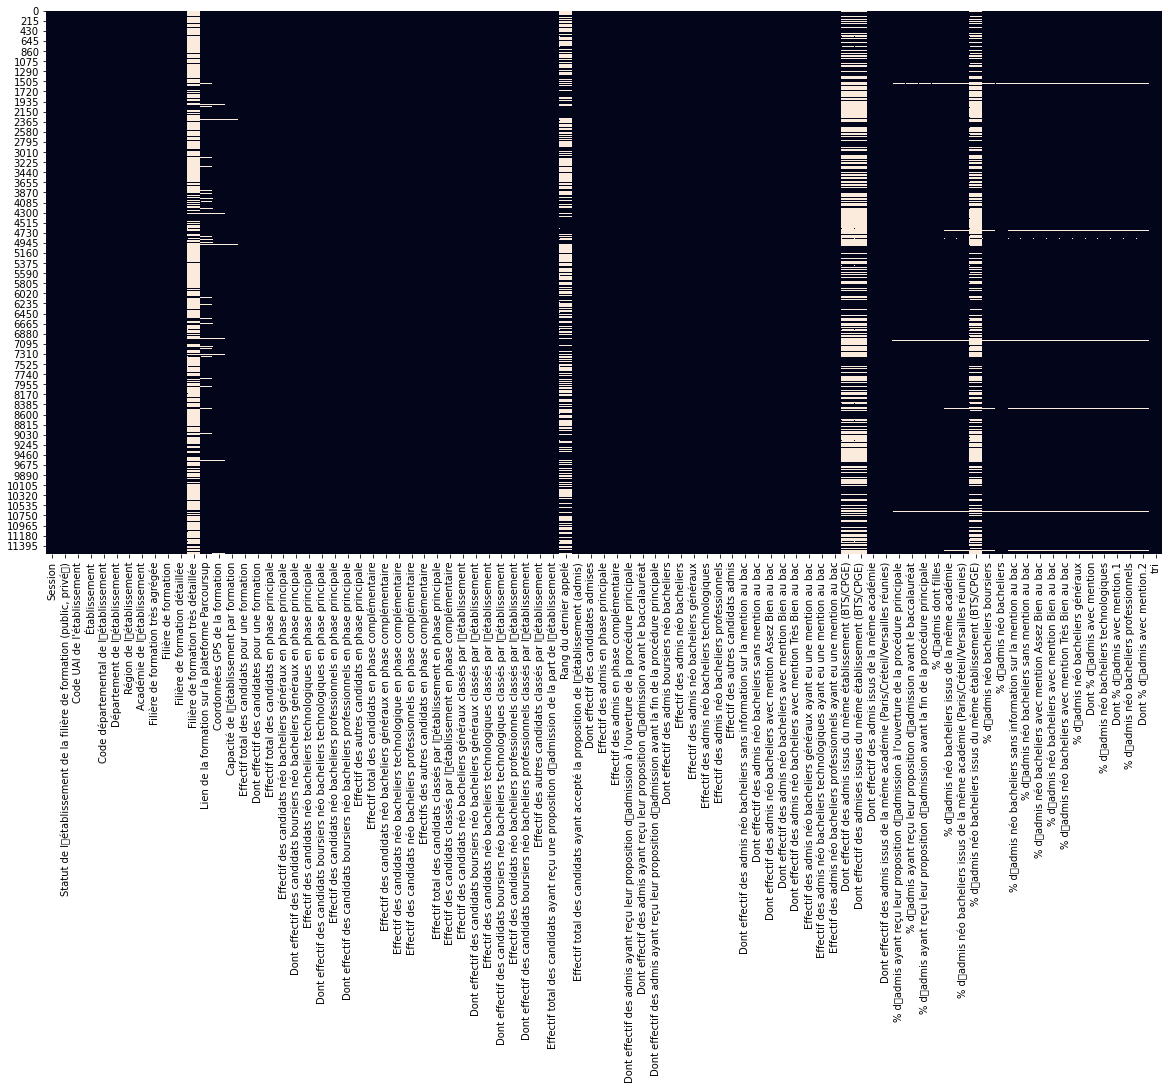

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### Selection des Variables à étudier

In [18]:
cols = ['Établissement',
    'Région de l\x92établissement',
        'Filière de formation',
        'Capacité de l\x92établissement par formation',
        'Effectif total des candidats pour une formation',
     'Dont effectif des candidates pour une formation',
     'Effectif total des candidats en phase principale']
cols

['Établissement',
 'Région de l\x92établissement',
 'Filière de formation',
 'Capacité de l\x92établissement par formation',
 'Effectif total des candidats pour une formation',
 'Dont effectif des candidates pour une formation',
 'Effectif total des candidats en phase principale']

In [19]:
df=df[cols];
df.sample(5)

Établissement  \
10946                                 Lycée Le Corbusier   
9231   Centre de Ressources, d'Expertise et de Perfor...   
10385                                     Lycée Mariette   
5511                              Lycée Georges Brassens   
996                          Lycée La Martinière Duchère   

      Région de létablissement Filière de formation  \
10946             Ile-de-France       BTS - Services   
9231            Hauts-de-France               BPJEPS   
10385           Hauts-de-France       BTS - Services   
5511       Auvergne-Rhône-Alpes     BTS - Production   
996        Auvergne-Rhône-Alpes       BTS - Services   

       Capacité de létablissement par formation  \
10946                                       28.0   
9231                                         3.0   
10385                                       35.0   
5511                                        20.0   
996                                         35.0   

       Effectif total des candidats pour une formation  \
10946                                              800   
9231                                               260   
10385                                              329   
5511                                               341   
996                                               4300   

       Dont effectif des candidates pour une formation  \
10946                                              582   
9231                                                58   
10385                                              173   
5511                                                87   
996                                               3007   

       Effectif total des candidats en phase principale  
10946                                               800  
9231                                                260  
10385                                               298  
5511                                                311  
996                                                3825

In [20]:
df=df.set_index('Établissement')
dataset_info(df)

 ● taille: (11577, 6)
-------------------------
 ● types de données:
 int64      3
object     2
float64    1
dtype: int64
-------------------------
 ● valeurs manquantes: 19
-------------------------
 ● nombre de valeurs: 69462


## Quanti 

In [21]:
df.select_dtypes(['int64','float64']).columns

Index(['Capacité de létablissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale'],
      dtype='object')

In [22]:
df.select_dtypes(['int64','float64']).head(5)

Capacité de létablissement par formation  \
Établissement                                                                         
La Prépa des INP - Groupe INP - Grenoble                                      112.0   
ESIREM Dijon                                                                   61.0   
Polytech Orléans                                                              151.0   
ISAT Nevers                                                                    91.0   
IMT Lille Douai                                                               126.0   

                                          Effectif total des candidats pour une formation  \
Établissement                                                                               
La Prépa des INP - Groupe INP - Grenoble                                             3582   
ESIREM Dijon                                                                         3510   
Polytech Orléans                                                                     6758   
ISAT Nevers                                                                          3497   
IMT Lille Douai                                                                      4633   

                                          Dont effectif des candidates pour une formation  \
Établissement                                                                               
La Prépa des INP - Groupe INP - Grenoble                                             1248   
ESIREM Dijon                                                                          766   
Polytech Orléans                                                                     1697   
ISAT Nevers                                                                           648   
IMT Lille Douai                                                                      1076   

                                          Effectif total des candidats en phase principale  
Établissement                                                                               
La Prépa des INP - Groupe INP - Grenoble                                              3582  
ESIREM Dijon                                                                          3510  
Polytech Orléans                                                                      6758  
ISAT Nevers                                                                           3497  
IMT Lille Douai                                                                       4633

In [23]:
df_resu=df.groupby('Établissement').sum()
df_resu.sample(5)

Capacité de létablissement par formation  \
Établissement                                                                                   
IFSI Lozérien                                                                            34.0   
Ensemble scolaire Isaac de l'Etoile - Le Porteau                                        102.0   
Ecole Sup. IRTS Etudes Supérieures ESF                                                   29.0   
Institut Catholique de Lille-Institut universit...                                       50.0   
Lycée Louis Rascol                                                                      292.0   

                                                    Effectif total des candidats pour une formation  \
Établissement                                                                                         
IFSI Lozérien                                                                                  5131   
Ensemble scolaire Isaac de l'Etoile - Le Porteau                                                563   
Ecole Sup. IRTS Etudes Supérieures ESF                                                          589   
Institut Catholique de Lille-Institut universit...                                              213   
Lycée Louis Rascol                                                                             2756   

                                                    Dont effectif des candidates pour une formation  \
Établissement                                                                                         
IFSI Lozérien                                                                                  4302   
Ensemble scolaire Isaac de l'Etoile - Le Porteau                                                154   
Ecole Sup. IRTS Etudes Supérieures ESF                                                          537   
Institut Catholique de Lille-Institut universit...                                              183   
Lycée Louis Rascol                                                                              439   

                                                    Effectif total des candidats en phase principale  
Établissement                                                                                         
IFSI Lozérien                                                                                   5131  
Ensemble scolaire Isaac de l'Etoile - Le Porteau                                                 544  
Ecole Sup. IRTS Etudes Supérieures ESF                                                           589  
Institut Catholique de Lille-Institut universit...                                               152  
Lycée Louis Rascol                                                                              2735

In [24]:
print("la taille du tableau quanti",df.select_dtypes(['int64','float64']).shape)
print("-------------------------------")
print("la taille du taille reduit par Etablissement",df_resu.shape)

la taille du tableau quanti (11577, 4)
-------------------------------
la taille du taille reduit par Etablissement (3156, 4)


In [25]:
df.select_dtypes(['int64','float64']).describe()

Capacité de létablissement par formation  \
count                               11558.000000   
mean                                   62.179529   
std                                   117.882521   
min                                     1.000000   
25%                                    22.000000   
50%                                    34.000000   
75%                                    55.000000   
max                                  3100.000000   

       Effectif total des candidats pour une formation  \
count                                     11577.000000   
mean                                        780.317785   
std                                        1268.800989   
min                                           0.000000   
25%                                         168.000000   
50%                                         353.000000   
75%                                         818.000000   
max                                       16899.000000   

       Dont effectif des candidates pour une formation  \
count                                     11577.000000   
mean                                        440.716939   
std                                         907.354800   
min                                           0.000000   
25%                                          47.000000   
50%                                         162.000000   
75%                                         427.000000   
max                                       12182.000000   

       Effectif total des candidats en phase principale  
count                                      11577.000000  
mean                                         746.090870  
std                                         1263.965728  
min                                            0.000000  
25%                                          147.000000  
50%                                          318.000000  
75%                                          767.000000  
max                                        16899.000000

In [26]:
df_resu.describe()

Capacité de létablissement par formation  \
count                                3156.000000   
mean                                  227.715779   
std                                   838.053053   
min                                     0.000000   
25%                                    35.000000   
50%                                    70.000000   
75%                                   140.000000   
max                                 17533.000000   

       Effectif total des candidats pour une formation  \
count                                      3156.000000   
mean                                       2862.401458   
std                                        6657.250138   
min                                           0.000000   
25%                                         324.750000   
50%                                         935.500000   
75%                                        3020.250000   
max                                      113349.000000   

       Dont effectif des candidates pour une formation  \
count                                      3156.000000   
mean                                       1616.660330   
std                                        4056.768529   
min                                           0.000000   
25%                                         118.500000   
50%                                         445.000000   
75%                                        1566.250000   
max                                       69428.000000   

       Effectif total des candidats en phase principale  
count                                       3156.000000  
mean                                        2736.848542  
std                                         6293.903463  
min                                            0.000000  
25%                                          290.750000  
50%                                          862.000000  
75%                                         2879.250000  
max                                       109583.000000

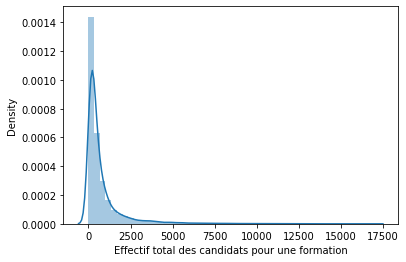

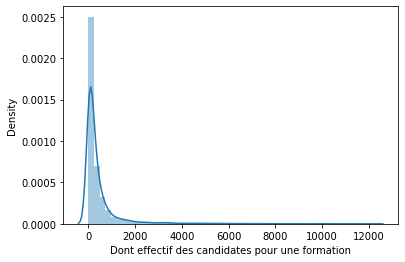

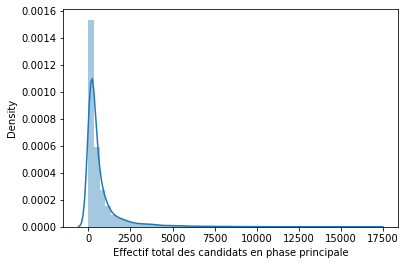

In [27]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df.select_dtypes(['int64','float64'])[col])

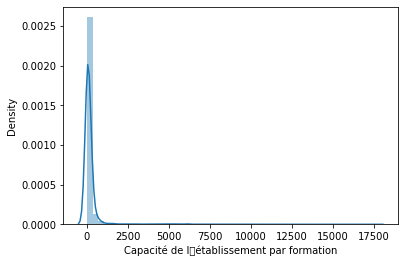

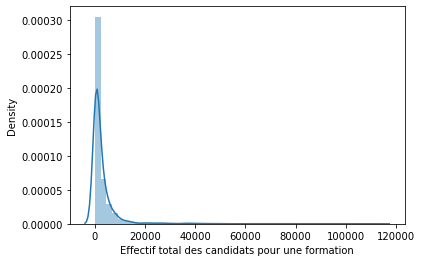

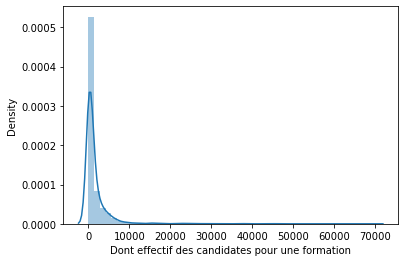

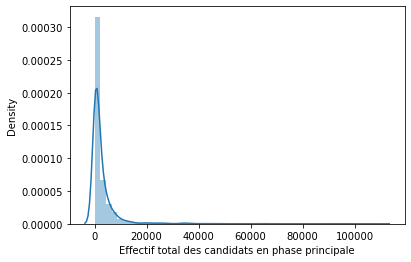

In [28]:
for col in df_resu:
    plt.figure()
    sns.distplot(df_resu[col])

## Conformité à la loi normale: test de de Kolmogorov-Smirnov

- **H0 : l’échantillon de chaque variable suit une loi normale**
- **H1 : l’échantillon de chaque variable ne suit pas une loi normale**

In [29]:
def Kolmogorov(col):
    alpha = 0.05
    stat, p =ks_2samp(df[col],list(np.random.normal(np.mean(df[col]), np.std(df[col]), 1000)))
    if p < alpha:
        return 'H0 Rejetée -- test significatif au niveau 5%'
    else :
        return 'Non H0 Rejetée -- test non significatif au niveau 5%'

In [30]:
for col in df.select_dtypes('int64'):
    print(" ")
    print(f'{col :-<50} {Kolmogorov(col)}')

 
Effectif total des candidats pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Dont effectif des candidates pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Effectif total des candidats en phase principale-- H0 Rejetée -- test significatif au niveau 5%


## Conformité à la loi normale: test de normalité d'Agostino

In [31]:
def Agostino(col):
    alpha = 0.05
    stat, p =stats.normaltest(df[col])
    if p < alpha:
        return 'H0 Rejetée -- test significatif au niveau 5%'
    else :
        return 'Non H0 Rejetée -- test non significatif au niveau 5%'

In [32]:
for col in df.select_dtypes('int64'):
    print(" ")
    print(f'{col :-<50} {Agostino(col)}')

 
Effectif total des candidats pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Dont effectif des candidates pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Effectif total des candidats en phase principale-- H0 Rejetée -- test significatif au niveau 5%


### Quali 2018

In [33]:
sns.set_theme(style="whitegrid")

Ile-de-France                 2151
Auvergne-Rhône-Alpes          1368
Hauts-de-France               1140
Grand Est                      996
Nouvelle-Aquitaine             982
Occitanie                      979
Provence Alpes Côte d'Azur     721
Pays de la Loire               660
Bretagne                       610
Normandie                      530
Bourgogne-Franche-Comté        490
Centre-Val de Loire            387
La Réunion                     164
Guadeloupe                      97
Martinique                      97
Polynésie française             59
Corse                           54
Guyane                          54
Mayotte                         32
Etranger                         6
Name: Région de létablissement, dtype: int64


<AxesSubplot:>

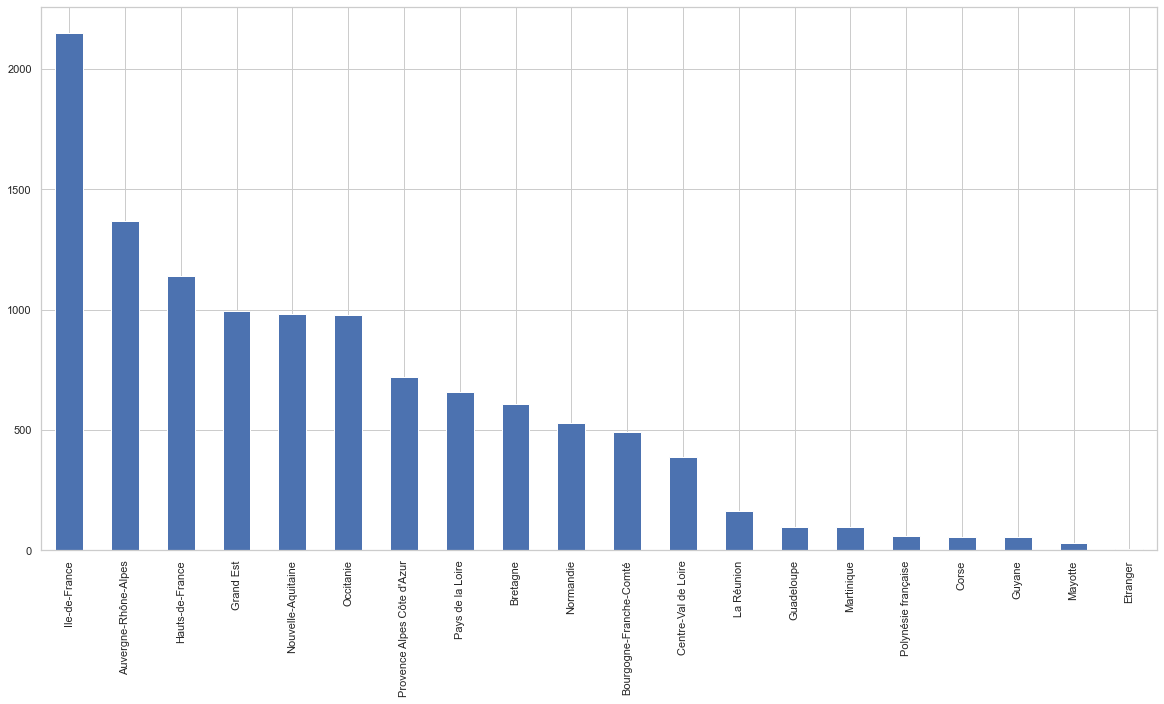

In [34]:
print(df['Région de l\x92établissement'].value_counts())
plt.figure(figsize=(20,10))
#df.groupby('Région de l\x92établissement').size().plot.hist()
df['Région de l\x92établissement'].value_counts().plot.bar()

BTS - Services                                                               2835
BTS - Production                                                             1770
Licence - Arts-lettres-langues                                               1072
Licence - Sciences - technologies - santé                                     566
BTSA                                                                          504
Licence - Sciences humaines et sociales                                       499
DUT - Production                                                              477
Classe préparatoire scientifique                                              444
Licence - Droit-économie-gestion                                              416
Mention complémentaire                                                        401
D.E secteur sanitaire                                                         372
Formations d'ingénieurs                                                       345
DUT - Service   

<AxesSubplot:>

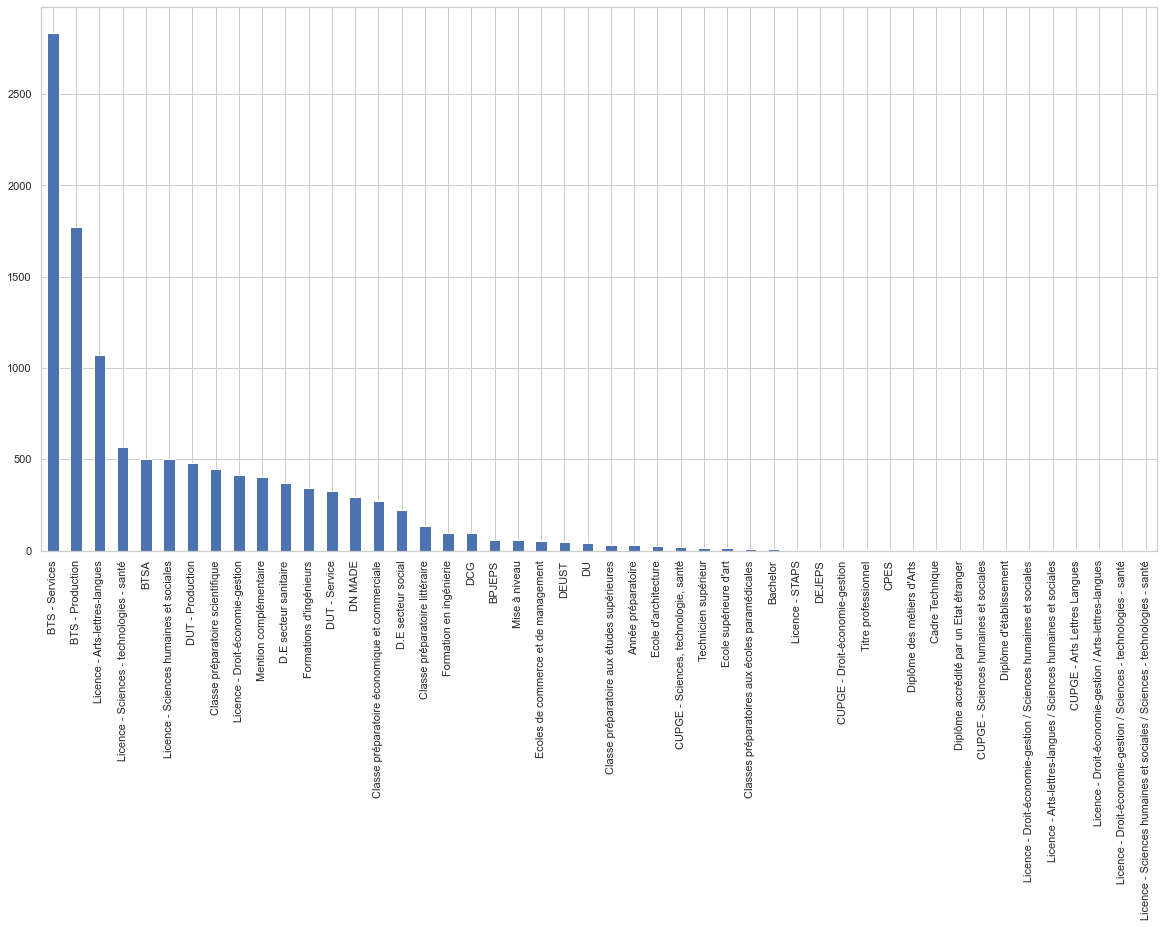

In [35]:
print(df['Filière de formation'].value_counts())
plt.figure(figsize=(20,10))
#df.groupby('Filière de formation').size().plot.hist()
df['Filière de formation'].value_counts().plot.bar()

## quanti * quanti  2018

<Figure size 1440x720 with 0 Axes>

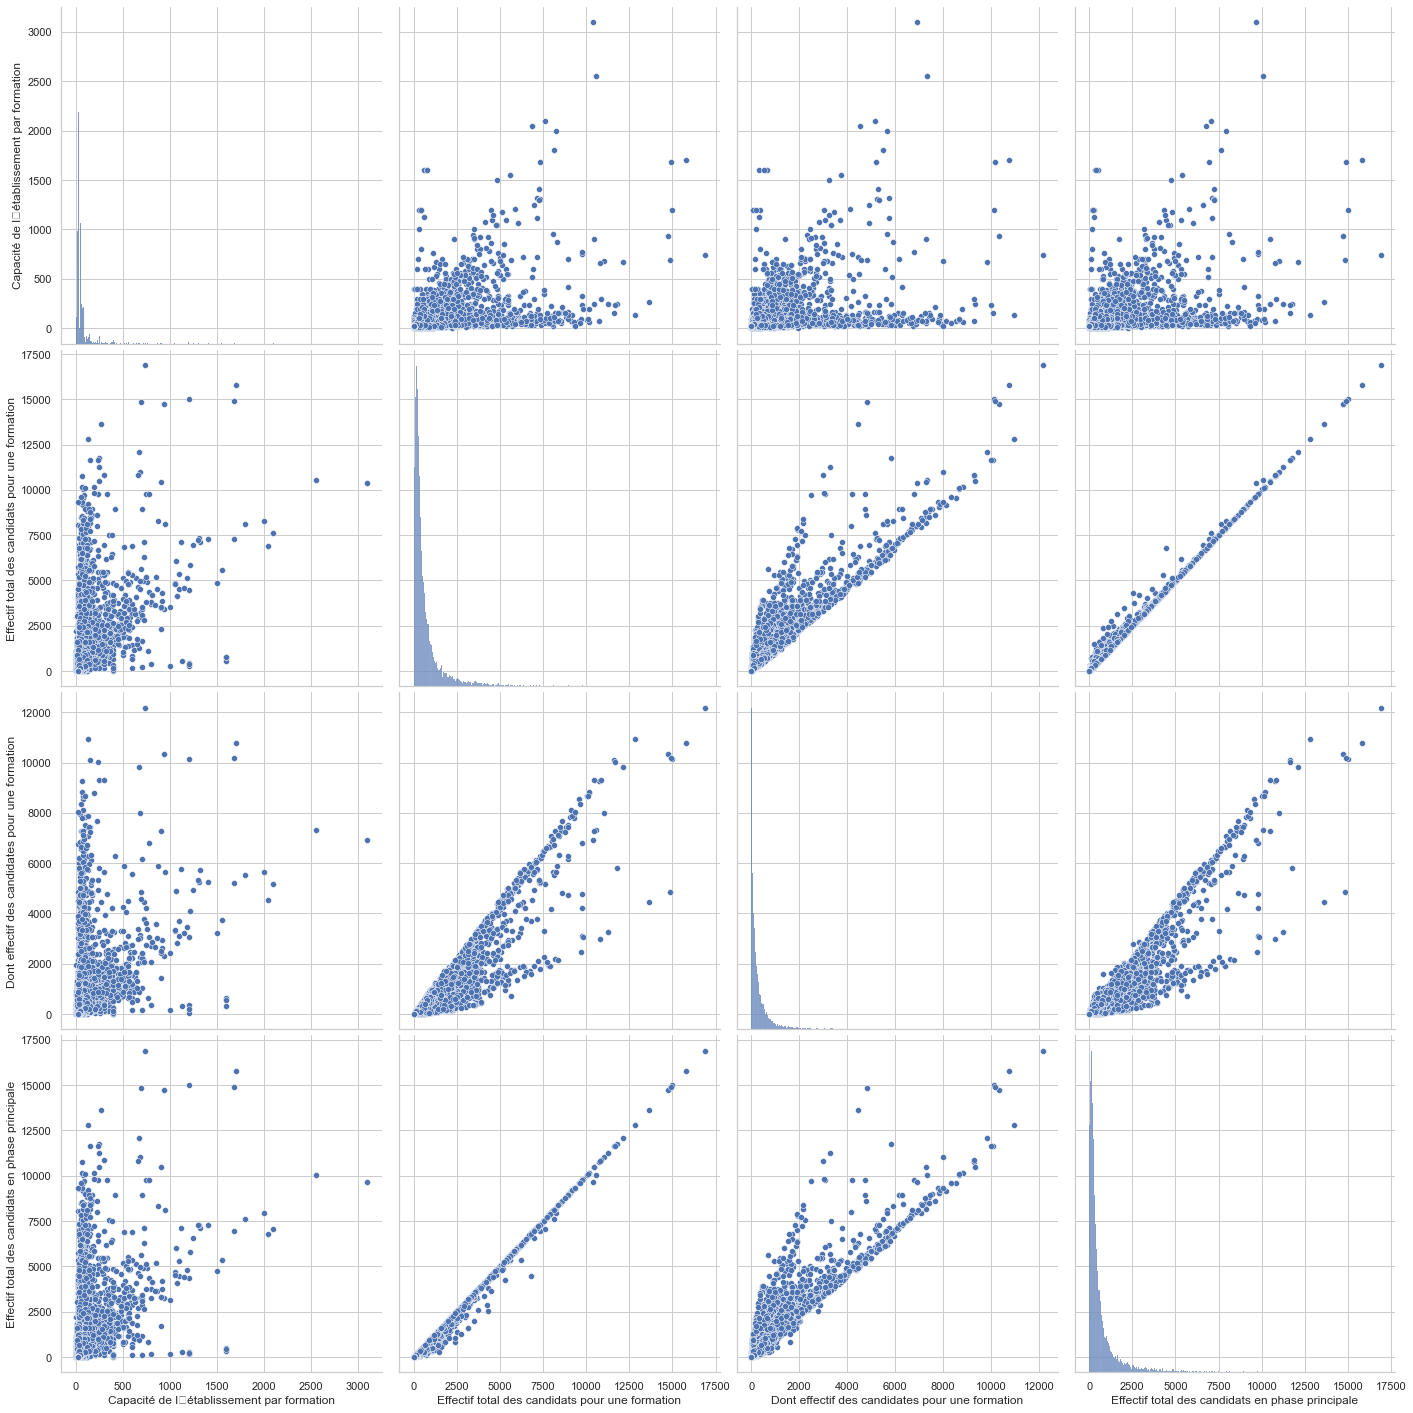

In [36]:
plt.figure(figsize=(20,10))
sns.pairplot(df.select_dtypes(['int64','float64']),size = 5)

<Figure size 1440x720 with 0 Axes>

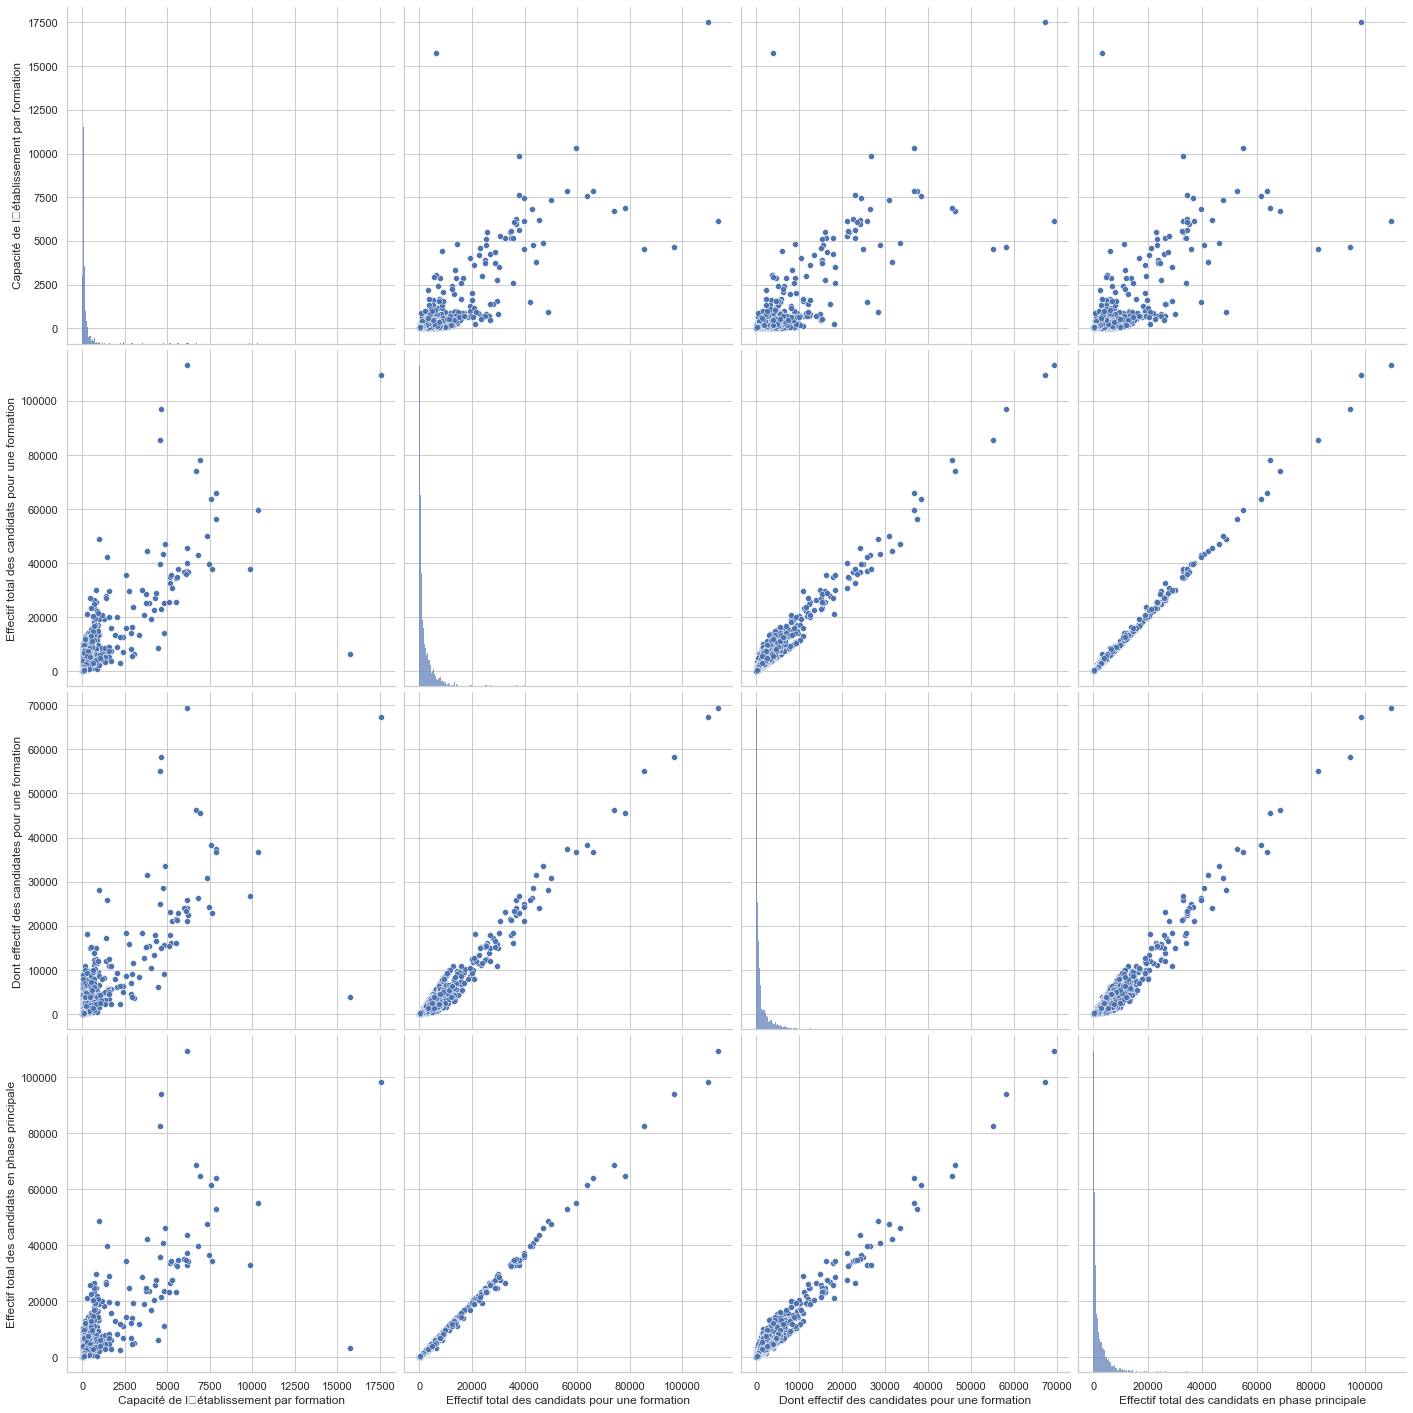

In [37]:
plt.figure(figsize=(20,10))
sns.pairplot(df_resu,size = 5)

<AxesSubplot:>

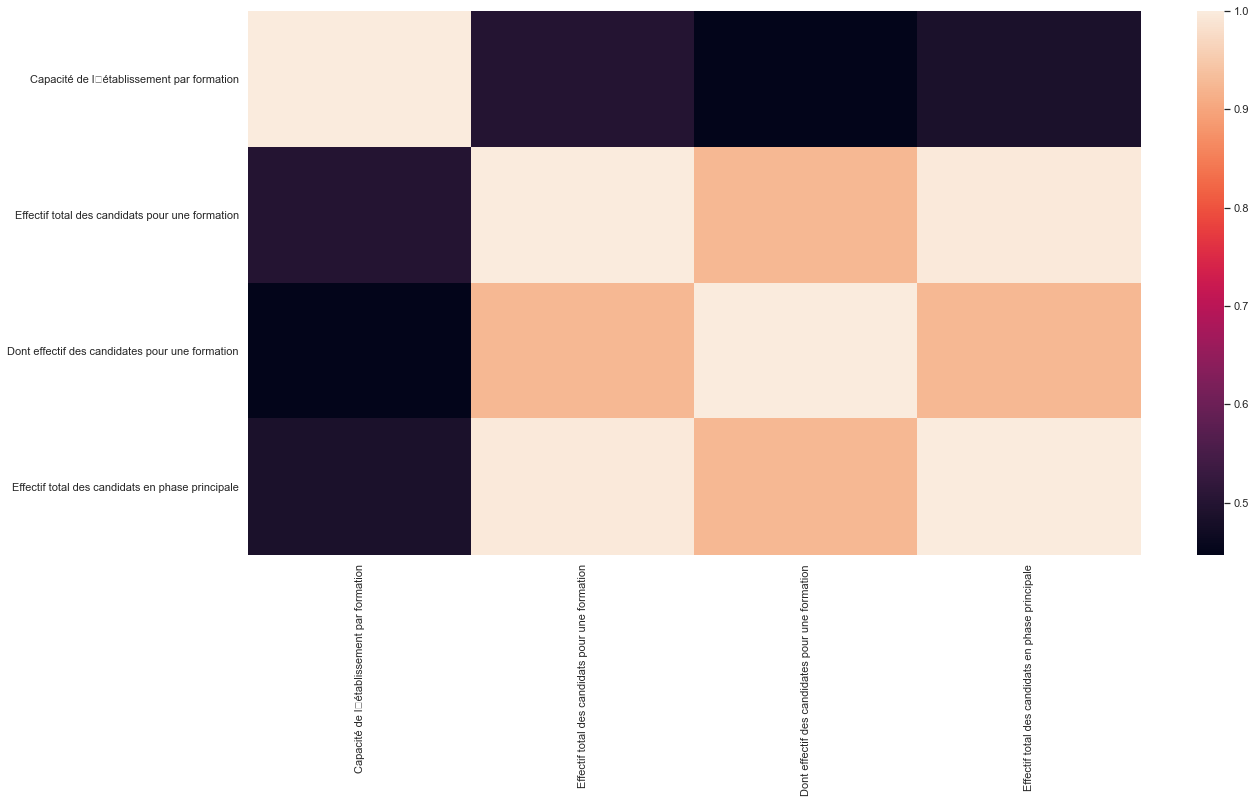

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(['int64','float64']).corr())

<AxesSubplot:>

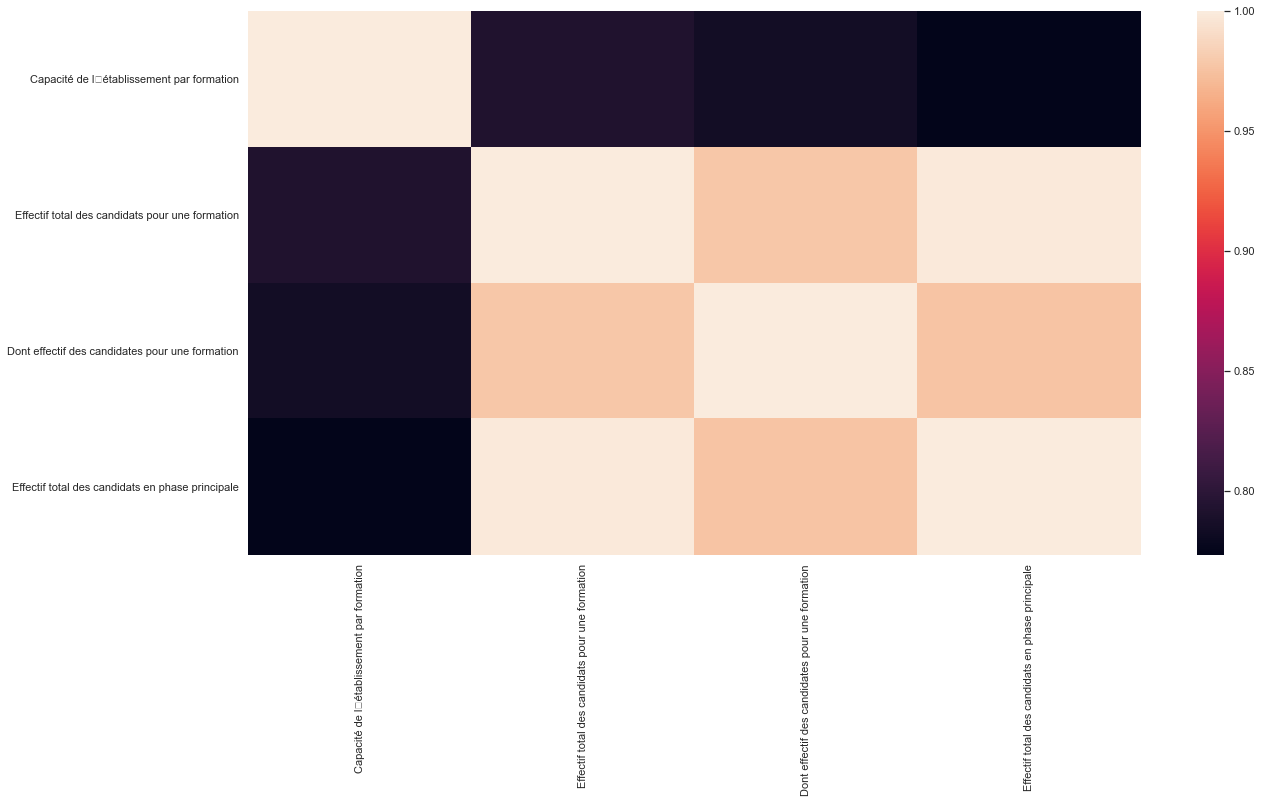

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df_resu.corr())

<AxesSubplot:title={'center':'correlations des quanti'}>

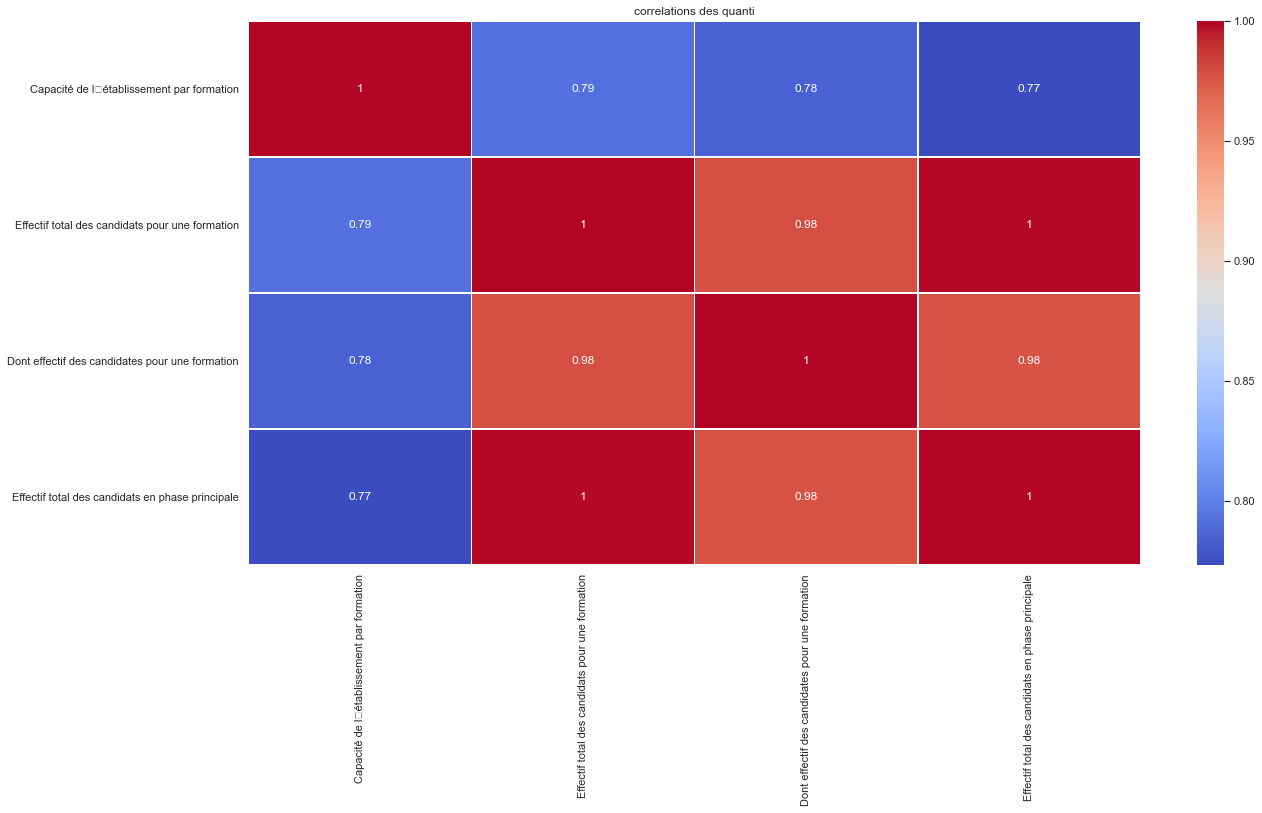

In [40]:
plt.figure(figsize=(20,10))
plt.title('correlations des quanti')
sns.heatmap(df_resu.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

In [41]:
import researchpy as rp
corr_type, corr_matrix, corr_ps = rp.corr_case(df_resu)
print(corr_type)

  Pearson correlation test using list-wise deletion
0                    Total observations used = 3156


In [42]:
corr_matrix

Capacité de létablissement par formation  \
Capacité de létablissement par formation                                                1   
Effectif total des candidats pour une formation                                     0.7925   
Dont effectif des candidates pour une formation                                     0.7841   
Effectif total des candidats en phase principale                                    0.7732   

                                                 Effectif total des candidats pour une formation  \
Capacité de létablissement par formation                                                 0.7925   
Effectif total des candidats pour une formation                                                1   
Dont effectif des candidates pour une formation                                           0.9786   
Effectif total des candidats en phase principale                                          0.9986   

                                                 Dont effectif des candidates pour une formation  \
Capacité de létablissement par formation                                                 0.7841   
Effectif total des candidats pour une formation                                           0.9786   
Dont effectif des candidates pour une formation                                                1   
Effectif total des candidats en phase principale                                          0.9767   

                                                 Effectif total des candidats en phase principale  
Capacité de létablissement par formation                                                  0.7732  
Effectif total des candidats pour une formation                                            0.9986  
Dont effectif des candidates pour une formation                                            0.9767  
Effectif total des candidats en phase principale                                                1

In [43]:
corr_ps

Capacité de létablissement par formation  \
Capacité de létablissement par formation                                           0.0000   
Effectif total des candidats pour une formation                                     0.0000   
Dont effectif des candidates pour une formation                                     0.0000   
Effectif total des candidats en phase principale                                    0.0000   

                                                 Effectif total des candidats pour une formation  \
Capacité de létablissement par formation                                                 0.0000   
Effectif total des candidats pour une formation                                           0.0000   
Dont effectif des candidates pour une formation                                           0.0000   
Effectif total des candidats en phase principale                                          0.0000   

                                                 Dont effectif des candidates pour une formation  \
Capacité de létablissement par formation                                                 0.0000   
Effectif total des candidats pour une formation                                           0.0000   
Dont effectif des candidates pour une formation                                           0.0000   
Effectif total des candidats en phase principale                                          0.0000   

                                                 Effectif total des candidats en phase principale  
Capacité de létablissement par formation                                                  0.0000  
Effectif total des candidats pour une formation                                            0.0000  
Dont effectif des candidates pour une formation                                            0.0000  
Effectif total des candidats en phase principale                                           0.0000

## quali * quali 2018

In [44]:
Tc=pd.crosstab(df['Région de l\x92établissement'], df['Filière de formation'])
Tc

Filière de formation        Année préparatoire  BPJEPS  BTS - Production  \
Région de létablissement                                                  
Auvergne-Rhône-Alpes                         1       7               200   
Bourgogne-Franche-Comté                      1       2                93   
Bretagne                                     4       3                99   
Centre-Val de Loire                          0       3                72   
Corse                                        0       0                 5   
Etranger                                     0       0                 0   
Grand Est                                    2      12               171   
Guadeloupe                                   0       1                16   
Guyane                                       0       0                 5   
Hauts-de-France                              1       5               181   
Ile-de-France                                3       4               227   
La Réunion                                   2       2                36   
Martinique                                   0       0                19   
Mayotte                                      0       0                 3   
Normandie                                    1       0               102   
Nouvelle-Aquitaine                           3       6               144   
Occitanie                                    4       6               170   
Pays de la Loire                             4       5                96   
Polynésie française                          0       0                 6   
Provence Alpes Côte d'Azur                   2       3               125   

Filière de formation        BTS - Services  BTSA  Bachelor  CPES  \
Région de létablissement                                          
Auvergne-Rhône-Alpes                   321    75         0     0   
Bourgogne-Franche-Comté                115    38         0     0   
Bretagne                               134    42         2     0   
Centre-Val de Loire                    107    21         0     0   
Corse                                   10     3         0     0   
Etranger                                 0     0         0     0   
Grand Est                              238    40         0     0   
Guadeloupe                              39     2         0     0   
Guyane                                  14     2         0     0   
Hauts-de-France                        325    37         0     0   
Ile-de-France                          462    16         5     3   
La Réunion                              56     4         0     0   
Martinique                              35     2         0     0   
Mayotte                                 12     0         0     0   
Normandie                              138    29         1     0   
Nouvelle-Aquitaine                     221    75         0     0   
Occitanie                              233    59         0     0   
Pays de la Loire                       172    43         1     0   
Polynésie française                     22     1         0     0   
Provence Alpes Côte d'Azur             181    15         0     0   

Filière de formation        CUPGE - Arts Lettres Langues  \
Région de létablissement                                  
Auvergne-Rhône-Alpes                                   0   
Bourgogne-Franche-Comté                                0   
Bretagne                                               0   
Centre-Val de Loire                                    0   
Corse                                                  0   
Etranger                                               0   
Grand Est                                              1   
Guadeloupe                                             0   
Guyane                                                 0   
Hauts-de-France                                        0   
Ile-de-France                                          0   
La Réunion                                        

<AxesSubplot:xlabel='Filière de formation', ylabel='Région de l\x92établissement'>

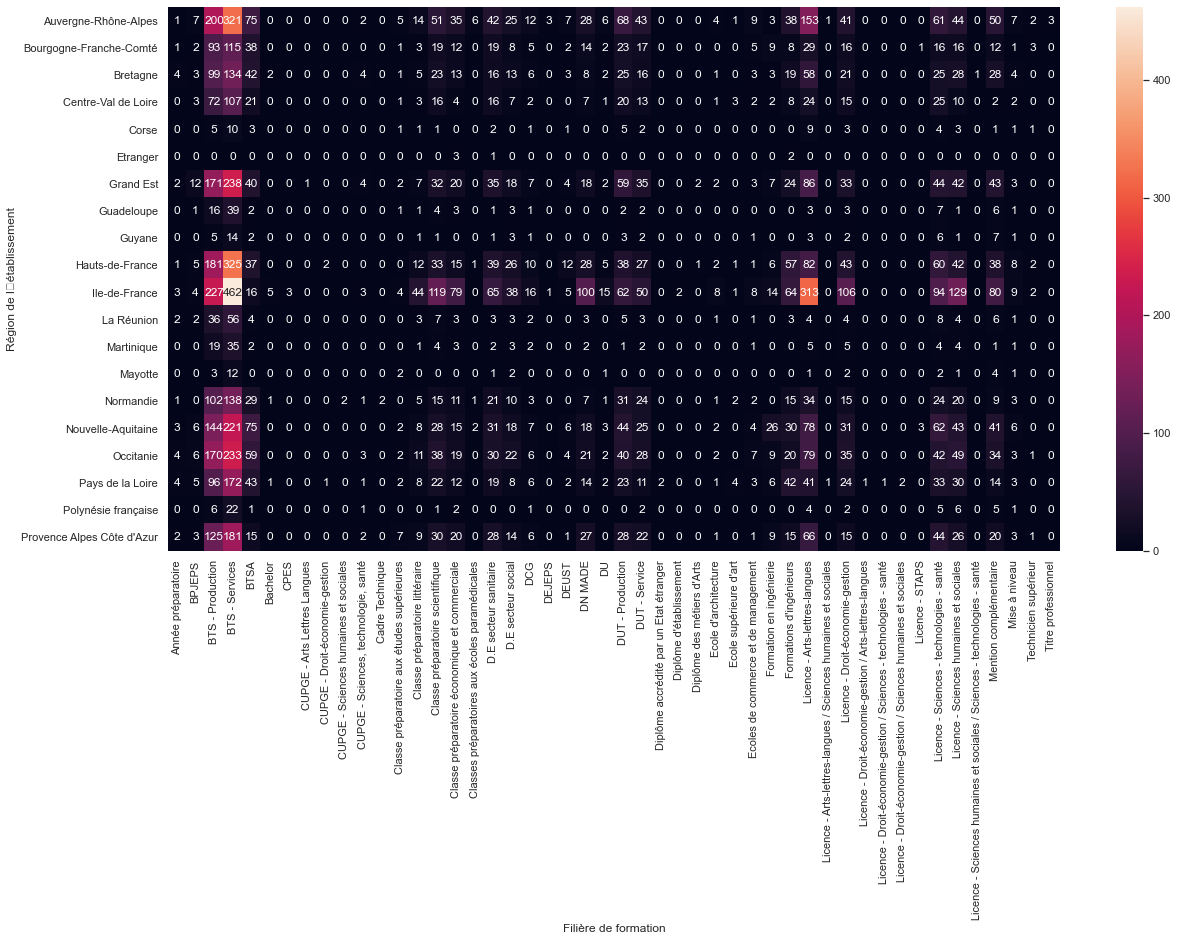

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df['Région de l\x92établissement'], df['Filière de formation']),annot=True,fmt='d')

## Test d’indépendance de khi deux

- **H0 : les deux variables sont indépendantes**
- **H1 : les deux variables sont liées**

In [46]:
def khi_deux(df):
    alpha = 0.05
    stat, p, dof, expected =chi2_contingency(df)
    if p < alpha:
        return 'H0 Rejetée -- test significatif au niveau 5%'
    else :
        return 'Non H0 Rejetée -- test non significatif au niveau 5%'

In [47]:
khi_deux(Tc)

'H0 Rejetée -- test significatif au niveau 5%'

# Modélisation

## ACP quanti 2019 (méthode 1)

In [48]:
from fanalysis.pca import PCA

In [49]:
# préparation des données pour l'ACP
#df_resu = df_resu.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_resu.values
features = df_resu.columns.values
names=df_resu.index.values

In [50]:
res_pca = PCA(std_unit=True,row_labels=names, col_labels=features)

In [51]:
res_pca

PCA(col_labels=array(['Capacité de l\x92établissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale'], dtype=object),
    row_labels=array(['3iL', 'ADES FORMATIONS', 'AFERTES', ...,
       "École Nationale des Techniciens de l'Équipement (ENTE) - Etablissement de Valenciennes",
       "École Nationale des Techniciens de l'Équipement (ENTE) - Site d'Aix-en-Provence",
       "École Supérieure d'Art du Nord-Pas de Calais : Dunkerque-Tourcoing"],
      dtype=object))

In [52]:
res_pca.fit(X)

PCA(col_labels=array(['Capacité de l\x92établissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale'], dtype=object),
    row_labels=array(['3iL', 'ADES FORMATIONS', 'AFERTES', ...,
       "École Nationale des Techniciens de l'Équipement (ENTE) - Etablissement de Valenciennes",
       "École Nationale des Techniciens de l'Équipement (ENTE) - Site d'Aix-en-Provence",
       "École Supérieure d'Art du Nord-Pas de Calais : Dunkerque-Tourcoing"],
      dtype=object))

In [53]:
#Analyse des valeurs propres
print("les valeurs propres en valeur absolue ", res_pca.eig_[0] )
print("les valeurs propres en pourcentage de la variance totale ", res_pca.eig_[1] )
print("les valeurs propres en pourcentage cumulé de la variance totale ", res_pca.eig_[2] )

les valeurs propres en valeur absolue  [3.66090286e+00 3.08899565e-01 2.92817260e-02 9.15844037e-04]
les valeurs propres en pourcentage de la variance totale  [9.15225716e+01 7.72248913e+00 7.32043150e-01 2.28961009e-02]
les valeurs propres en pourcentage cumulé de la variance totale  [ 91.52257162  99.24506075  99.9771039  100.        ]


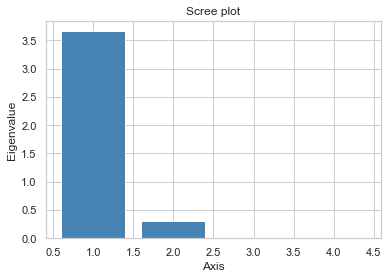

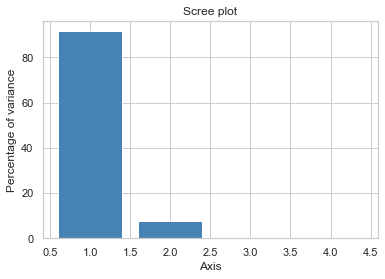

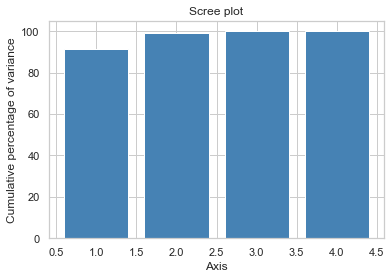

In [54]:
res_pca.plot_eigenvalues()
res_pca.plot_eigenvalues(type="percentage")
res_pca.plot_eigenvalues(type="cumulative")

#### graphiques

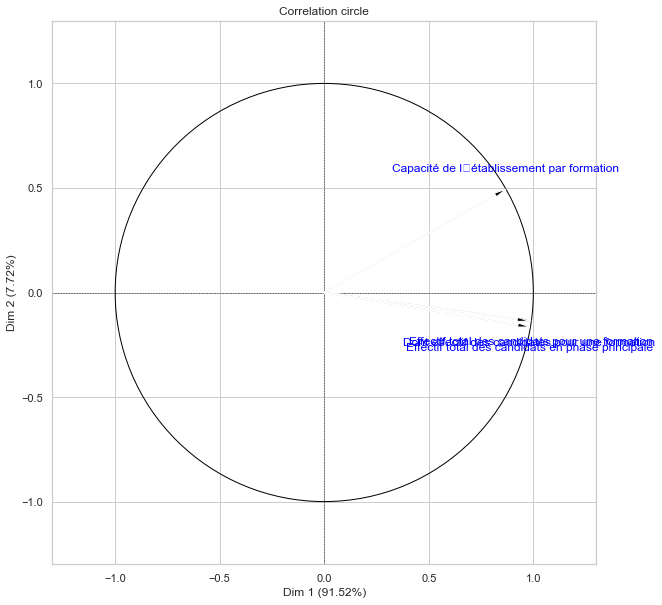

In [55]:
#res_pca.correlation_circle(num_x_axis=1, num_y_axis=2)
res_pca.correlation_circle(1, 2, figsize=(12, 10))

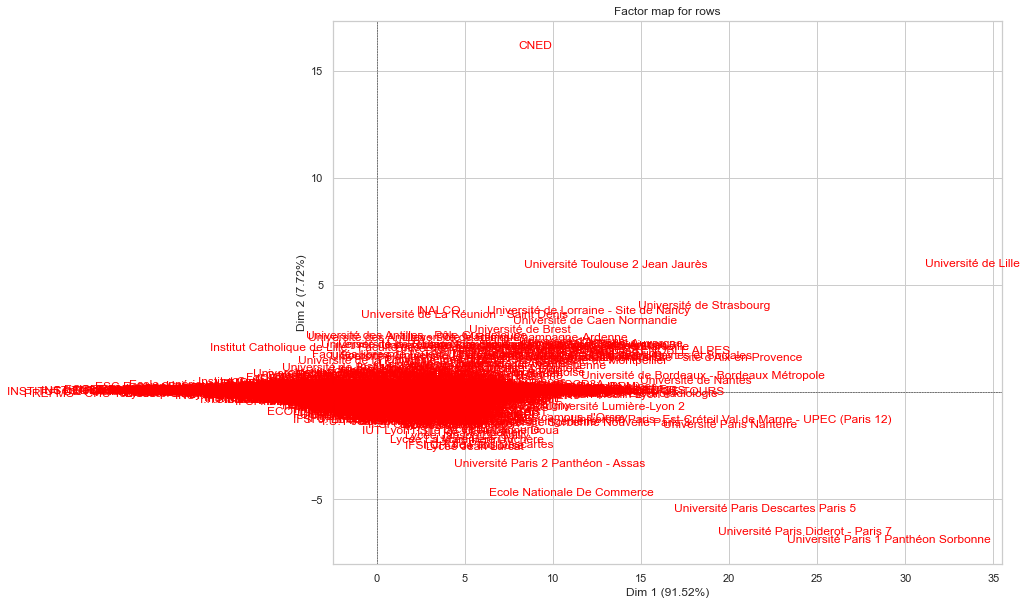

In [56]:
#res_pca.mapping_row(num_x_axis=1, num_y_axis=2)
res_pca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

#### les individus

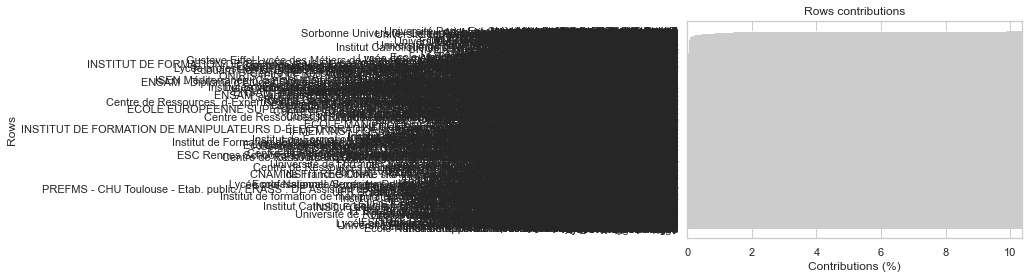

In [57]:
res_pca.plot_row_contrib(num_axis=1)

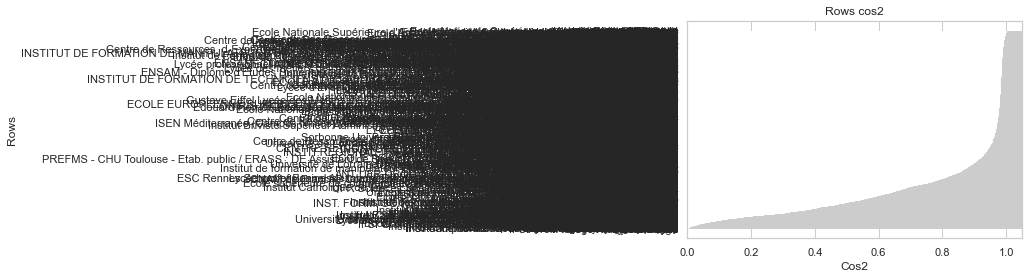

In [58]:
res_pca.plot_row_cos2(num_axis=1)

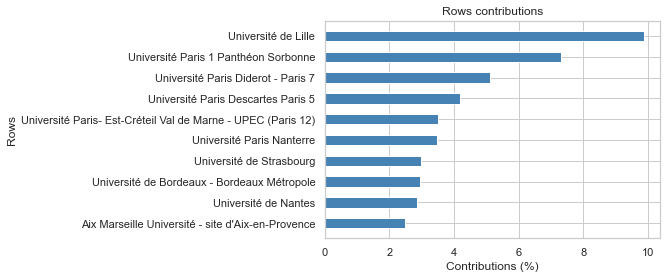

In [59]:
res_pca.plot_row_contrib(num_axis=1, nb_values=10)

#### les variables

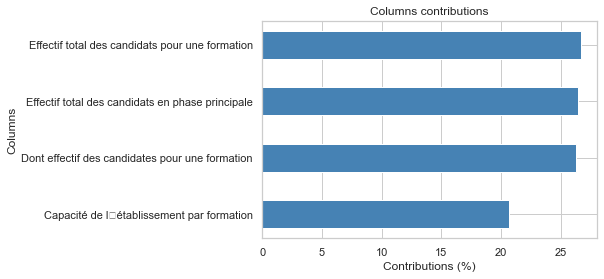

In [60]:
res_pca.plot_col_contrib(num_axis=1)

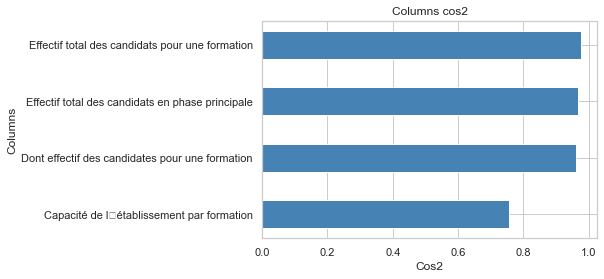

In [61]:
res_pca.plot_col_cos2(num_axis=1)

### ACP quanti 2019 (méthode 2)

In [62]:
from sklearn import decomposition
from sklearn import preprocessing
from functions import *   

In [63]:
# choix du nombre de composantes à calculer
n_comp =4

In [64]:
# préparation des données pour l'ACP
#dfresu_2018 = dfresu_2018.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_resu.values
features = df_resu.columns
names=df_resu.index

In [65]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)  #StandardScaler(with_std=False) pour centrer
X_scaled = std_scale.transform(X)

In [66]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

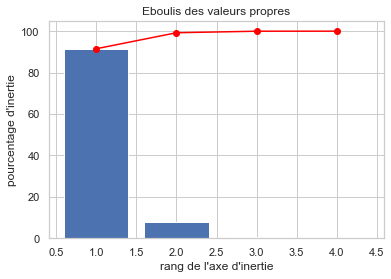

In [67]:
# Eboulis des valeurs propres
display_scree_plot(pca)

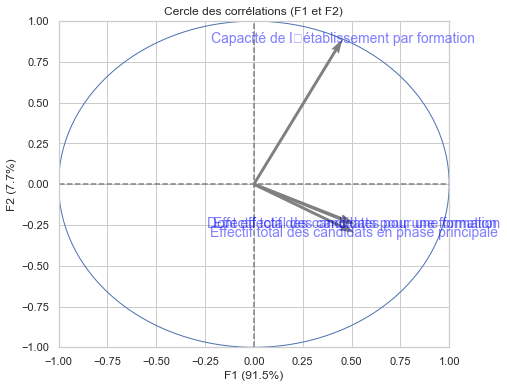

In [68]:
# Cercle des corrélations
pcs = pca.components_
#display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)])
#display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))
#display_circles(pcs, n_comp, pca, [(0,1)], lims=[.0155, .019, 0.053, .057], labels = np.array(features))
#display_circles(pcs, n_comp, pca, [(2,3)], lims=[-.035, -.026, -.03,-.016], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

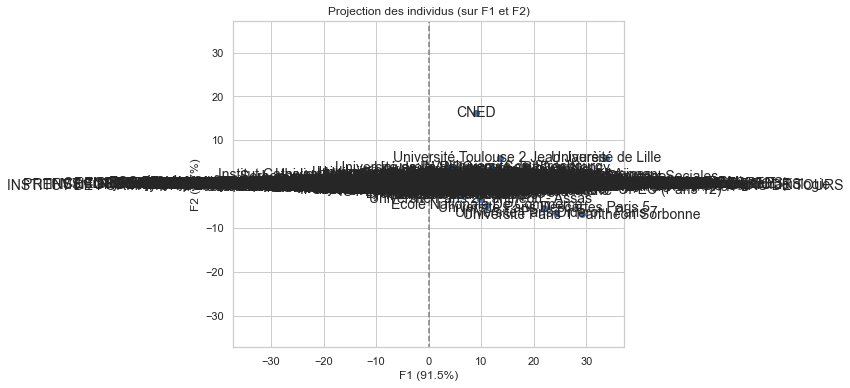

In [69]:
# Projection des individus
X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var =names, alpha = 0.5) #pour la classification
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))

plt.show()

### AFC 2019

In [70]:
from fanalysis.ca import CA

In [71]:
# préparation des données pour l'ACP
#df_resu = df_resu.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = Tc.values
features = Tc.columns.values
names=Tc.index.values

In [72]:
res_ca = CA(row_labels=names, col_labels=features)

In [73]:
res_ca .fit(X)

CA(col_labels=array(['Année préparatoire', 'BPJEPS', 'BTS - Production',
       'BTS - Services', 'BTSA', 'Bachelor', 'CPES',
       'CUPGE - Arts Lettres Langues', 'CUPGE - Droit-économie-gestion',
       'CUPGE - Sciences humaines et sociales',
       'CUPGE - Sciences, technologie, santé', 'Cadre Technique',
       'Classe préparatoire aux études supérieures',
       'Classe préparatoire littéraire',
       'Classe préparatoire scienti...
       'Titre professionnel'], dtype=object),
   row_labels=array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Corse', 'Etranger', 'Grand Est',
       'Guadeloupe', 'Guyane', 'Hauts-de-France', 'Ile-de-France',
       'La Réunion', 'Martinique', 'Mayotte', 'Normandie',
       'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire',
       'Polynésie française', "Provence Alpes Côte d'Azur"], dtype=object))

In [74]:
#Analyse des valeurs propres
print("les valeurs propres en valeur absolue ", res_ca .eig_[0] )
print(" ")
print("-----------------------------------------------------")
print(" ")
print("les valeurs propres en pourcentage de la variance totale ", res_ca .eig_[1] )
print(" ")
print("-----------------------------------------------------")
print(" ")
print("les valeurs propres en pourcentage cumulé de la variance totale ", res_ca .eig_[2] )

les valeurs propres en valeur absolue  [0.04020028 0.01779168 0.01400772 0.01269349 0.00925254 0.00776163
 0.00747577 0.006712   0.00638844 0.00501724 0.00412911 0.00280321
 0.0024615  0.00221814 0.00169369 0.0011615  0.00083304 0.00055011
 0.00034956]
 
-----------------------------------------------------
 
les valeurs propres en pourcentage de la variance totale  [28.01400057 12.3983263   9.7614352   8.84559603  6.44773363  5.40877587
  5.20956943  4.67733265  4.4518556   3.49632021  2.87741507  1.95344689
  1.7153221   1.54573271  1.18026889  0.80940551  0.58051353  0.38335321
  0.2435966 ]
 
-----------------------------------------------------
 
les valeurs propres en pourcentage cumulé de la variance totale  [ 28.01400057  40.41232688  50.17376208  59.01935811  65.46709174
  70.87586761  76.08543704  80.76276969  85.21462529  88.71094549
  91.58836056  93.54180745  95.25712955  96.80286226  97.98313115
  98.79253666  99.3730502   99.7564034  100.        ]


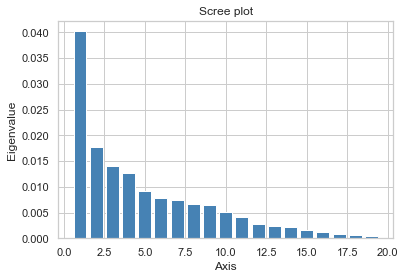

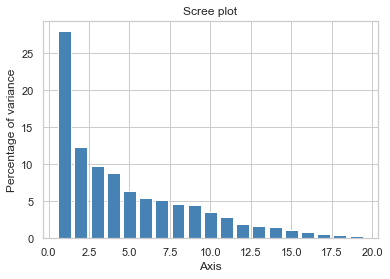

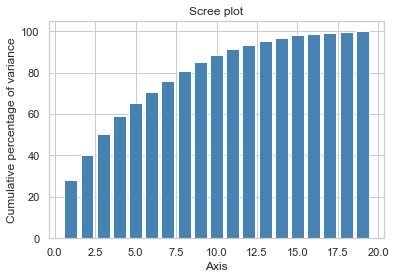

In [75]:
res_ca.plot_eigenvalues()
res_ca .plot_eigenvalues(type="percentage")
res_ca .plot_eigenvalues(type="cumulative")

In [76]:
#Extraction des statistiques sur les points lignes
df_rows = res_ca.row_topandas()
print(df_rows)

                            row_coord_dim1  row_coord_dim2  row_coord_dim3  \
Auvergne-Rhône-Alpes              0.013603        0.068312       -0.053205   
Bourgogne-Franche-Comté           0.187468        0.082935       -0.153568   
Bretagne                          0.070323        0.030452       -0.070887   
Centre-Val de Loire               0.197731       -0.029338        0.119242   
Corse                            -0.026723        0.248579       -0.124226   
Etranger                         -0.831016       -1.365398       -0.378998   
Grand Est                         0.077580        0.088558        0.026565   
Guadeloupe                        0.141594        0.147958        0.386712   
Guyane                            0.118756        0.296870        0.156783   
Hauts-de-France                   0.053501       -0.073083        0.098069   
Ile-de-France                    -0.392709       -0.024608       -0.010609   
La Réunion                        0.169768        0.014389      

In [77]:
###Statistiques pour les points lignes
# Coordonnées des points lignes
print(res_ca.row_coord_)

[[ 1.36032198e-02  6.83122708e-02 -5.32051564e-02 -7.24060955e-02
  -2.14665788e-01 -4.34614063e-02  1.24987332e-02 -5.17178509e-03
   4.98194628e-02 -4.54683539e-02 -3.39430734e-02  4.65357553e-03
  -1.66380782e-02  1.02919182e-02 -1.02038746e-02  2.51402814e-03
  -2.04835249e-03  1.79985745e-03 -1.53013520e-03]
 [ 1.87468323e-01  8.29350564e-02 -1.53568216e-01 -4.84955364e-02
   1.26643949e-01 -1.11379803e-01 -2.93514956e-02 -5.13631020e-02
   5.58105967e-02 -6.92972240e-02  1.23882355e-01 -4.07982887e-02
   7.64670297e-02  6.01328463e-02 -1.12549176e-02  2.24027819e-02
  -5.08234613e-02  3.52635929e-02  3.12039327e-03]
 [ 7.03228348e-02  3.04519085e-02 -7.08871186e-02  3.74869345e-03
  -3.05425883e-02  2.32378415e-01  3.03327334e-02 -3.20691908e-02
  -1.97394401e-02 -2.39596211e-02  1.16227091e-01  8.19657623e-02
  -3.42965544e-02 -6.58187128e-02  2.00802506e-02 -2.71330764e-03
  -3.60847994e-02 -3.28045363e-03 -1.64113797e-03]
 [ 1.97731203e-01 -2.93381524e-02  1.19242243e-01 -7.63

In [78]:
# Contributions des points lignes
print(res_ca.row_contrib_)

[[5.43931803e-02 3.09934938e+00 2.38797582e+00 4.88044372e+00
  5.88511203e+01 2.87570755e+00 2.46925714e-01 4.70889315e-02
  4.59085066e+00 4.86904084e+00 3.29712921e+00 9.12868202e-02
  1.32891374e+00 5.64279677e-01 7.26416024e-01 6.42998950e-02
  5.95159259e-02 6.95846218e-02 7.91451937e-02]
 [3.70021356e+00 1.63628656e+00 7.12582476e+00 7.84192289e-01
  7.33682128e+00 6.76487916e+00 4.87758421e-01 1.66360557e+00
  2.06366120e+00 4.05104074e+00 1.57312245e+01 2.51320794e+00
  1.00542318e+01 6.89978024e+00 3.16555463e-01 1.82887441e+00
  1.31238804e+01 9.56753710e+00 1.17894511e-01]
 [6.48182790e-01 2.74628663e-01 1.89016998e+00 5.83327758e-03
  5.31232309e-01 3.66583132e+01 6.48486823e-01 8.07342170e-01
  3.21372329e-01 6.02876815e-01 1.72382079e+01 1.26282522e+01
  2.51788094e+00 1.02906845e+01 1.25440330e+00 3.33973348e-02
  8.23599611e+00 1.03073874e-01 4.05974597e-02]
 [3.25114474e+00 1.61719906e-01 3.39318563e+00 1.53318338e+00
  1.21017307e+00 3.93760798e+00 5.08841911e+00 3.7

In [79]:
# Cos2 des points lignes
print(res_ca.row_cos2_)

[[2.74941261e-03 6.93352256e-02 4.20594836e-02 7.78944914e-02
  6.84671353e-01 2.80649349e-02 2.32107131e-03 3.97408753e-04
  3.68769139e-02 3.07167280e-02 1.71182284e-02 3.21758495e-04
  4.11303884e-03 1.57379856e-03 1.54698717e-03 9.39067383e-05
  6.23398679e-05 4.81318668e-05 3.47869296e-05]
 [2.53278696e-01 4.95700278e-02 1.69959542e-01 1.69490909e-02
  1.15587738e-01 8.94037564e-02 6.20873816e-03 1.90127686e-02
  2.24479252e-02 3.46078444e-02 1.10601695e-01 1.19957324e-02
  4.21396880e-02 2.60595190e-02 9.12909048e-04 3.61698558e-03
  1.86153562e-02 8.96181540e-03 7.01716261e-05]
 [5.13967988e-02 9.63767696e-03 5.22249436e-02 1.46050546e-04
  9.69516064e-03 5.61222280e-01 9.56238946e-03 1.06885634e-02
  4.04960804e-03 5.96627441e-03 1.40397078e-01 6.98245743e-02
  1.22248718e-02 4.50237953e-02 4.19065190e-03 7.65140885e-05
  1.35329327e-02 1.11843600e-04 2.79919734e-05]
 [2.73314653e-01 6.01697242e-03 9.93968846e-02 4.06979640e-02
  2.34156410e-02 6.39120782e-02 7.95492672e-02 5.3

In [80]:
#Extraction des statistiques sur les points colonnes
df_cols = res_ca.col_topandas()
print(df_cols)

                                                    col_coord_dim1  \
Année préparatoire                                        0.263485   
BPJEPS                                                    0.303569   
BTS - Production                                          0.153456   
BTS - Services                                            0.058484   
BTSA                                                      0.447111   
Bachelor                                                 -0.801160   
CPES                                                     -1.958645   
CUPGE - Arts Lettres Langues                              0.386930   
CUPGE - Droit-économie-gestion                            0.457792   
CUPGE - Sciences humaines et sociales                     1.041605   
CUPGE - Sciences, technologie, santé                     -0.017446   
Cadre Technique                                           1.041605   
Classe préparatoire aux études supérieures               -0.046456   
Classe préparatoire 

In [81]:
##Statistiques pour les points colonnes
# Coordonnées des points colonnes
print(res_ca.col_coord_)

[[ 2.63484866e-01 -2.74861221e-01 -1.22899437e-01  1.28465557e-01
   2.18938915e-01  4.52465230e-01 -4.75973624e-02 -2.05303765e-01
   1.30251946e-01 -1.12117906e-01  1.13722816e-01  2.09781794e-01
  -2.20087935e-01  1.62645970e-01  2.06297254e-01 -2.34638458e-01
   1.28765688e-01  8.68521864e-02 -1.00602253e-01]
 [ 3.03569377e-01 -9.11180813e-03 -4.30725812e-02  1.54305210e-01
   2.65703576e-02  1.11465375e-01  1.80758111e-01 -4.73547957e-03
   3.28307590e-01  1.79826204e-01 -1.97197661e-01  3.77007256e-02
   8.30888828e-02  1.21595845e-02  2.44796073e-03 -1.55813937e-01
   1.08285885e-02  1.58491798e-02  4.93799886e-02]
 [ 1.53456139e-01  3.17461587e-02  4.86230530e-02 -4.06781857e-02
   5.43039601e-02 -5.61087769e-03  1.64525979e-02 -9.03920885e-03
   4.98643309e-02 -8.08203682e-03  1.56560948e-02  2.99061869e-02
  -1.52400544e-02  1.44933269e-02 -5.11864434e-03  2.75263426e-03
  -2.46215851e-04 -1.62749037e-03 -5.95535677e-03]
 [ 5.84842188e-02 -9.12619866e-03  1.01490181e-01  4.64

In [82]:
# Contributions des points colonnes
print(res_ca.col_contrib_)

[[4.17680602e-01 1.02700360e+00 2.60791958e-01 3.14452024e-01
  1.25298803e+00 6.37939544e+00 7.32946088e-02 1.51881074e+00
  6.42296360e-01 6.05964029e-01 7.57531647e-01 3.79701288e+00
  4.75942924e+00 2.88443198e+00 6.07734683e+00 1.14641094e+01
  4.81388871e+00 3.31642743e+00 7.00248658e+00]
 [1.16826900e+00 2.37819870e-03 6.74978888e-02 9.55952125e-01
  3.88856874e-02 8.15798775e-01 2.22738773e+00 1.70267494e-03
  8.59850294e+00 3.28470840e+00 4.79957818e+00 2.58404384e-01
  1.42936197e+00 3.39707505e-02 1.80314229e-03 1.06524257e+01
  7.17353823e-02 2.32710806e-01 3.55494447e+00]
 [8.95605442e+00 8.66049320e-01 2.58044196e+00 1.99305540e+00
  4.87280731e+00 6.20134568e-02 5.53592830e-01 1.86116941e-01
  5.95062039e+00 1.99046145e-01 9.07585805e-01 4.87802253e+00
  1.44261577e+00 1.44785510e+00 2.36511504e-01 9.97365144e-02
  1.11261008e-03 7.36141121e-02 1.55119957e+00]
 [2.08355693e+00 1.14635702e-01 1.80068396e+01 4.16921746e+00
  1.78631496e-02 7.56479358e-01 5.45737218e-02 2.5

In [83]:
# Cos2 des points colonnes
print(res_ca.col_cos2_)

[[9.05278597e-02 9.85139751e-02 1.96956666e-02 2.15201012e-02
  6.25052970e-02 2.66957006e-01 2.95417811e-03 5.49622788e-02
  2.21227618e-02 1.63915815e-02 1.68642142e-02 5.73860710e-02
  6.31630905e-02 3.44951084e-02 5.54955034e-02 7.17908823e-02
  2.16207725e-02 9.83631464e-03 1.31973373e-02]
 [2.43599226e-01 2.19466944e-04 4.90412783e-03 6.29391918e-02
  1.86618539e-03 3.28427830e-02 8.63685384e-02 5.92772324e-05
  2.84919274e-01 8.54802804e-02 1.02792991e-01 3.75715751e-03
  1.82492837e-02 3.90838607e-04 1.58404996e-05 6.41759916e-02
  3.09958594e-04 6.64008390e-04 6.44557928e-03]
 [6.52070758e-01 2.79067046e-02 6.54652210e-02 4.58193939e-02
  8.16562052e-02 8.71741645e-04 7.49540588e-03 2.26249189e-03
  6.88503548e-02 1.80870542e-03 6.78723797e-03 2.47655671e-02
  6.43130679e-03 5.81650848e-03 7.25497797e-04 2.09808564e-04
  1.67864247e-06 7.33437390e-05 9.82068450e-04]
 [1.84834664e-01 4.50076018e-03 5.56613951e-01 1.16784328e-01
  3.64727104e-04 1.29568366e-02 9.00302217e-04 3.7

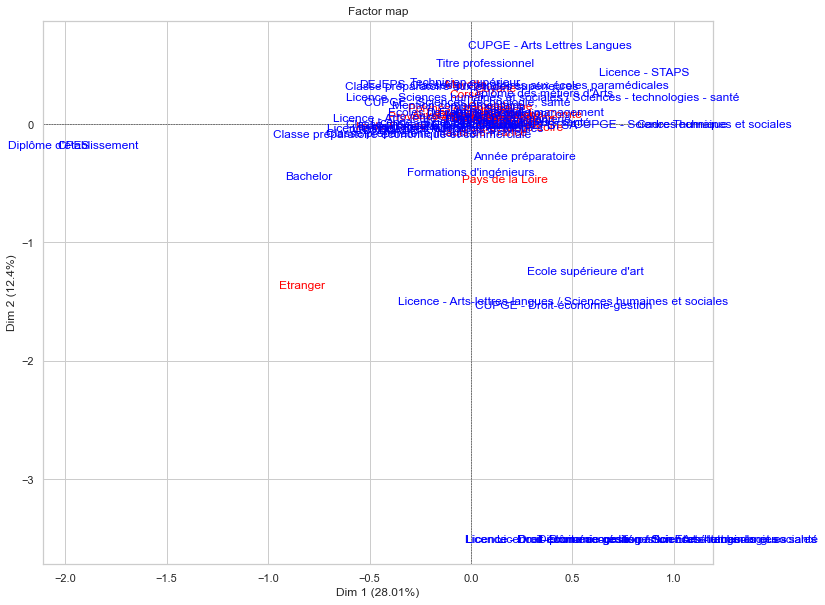

In [84]:
##Graphiques
#Graphiques factoriels
# Mapping simultané des points lignes et colonnes
res_ca.mapping(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

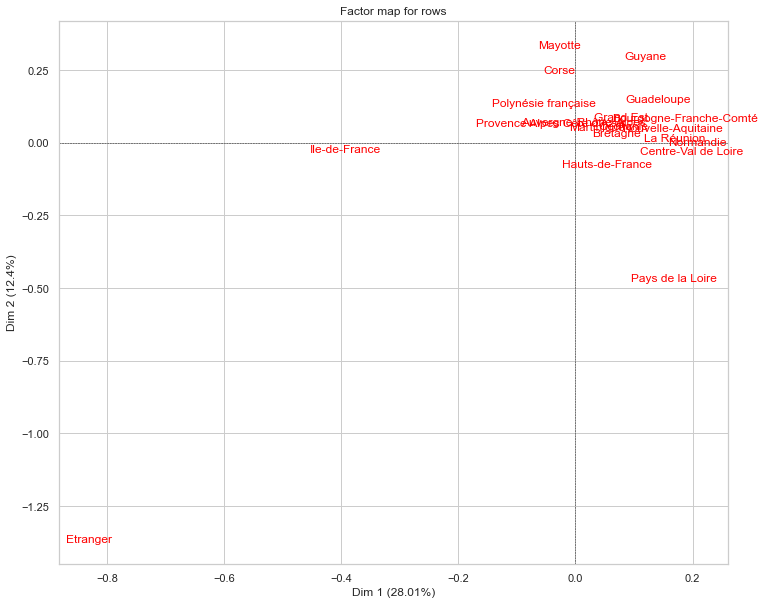

In [85]:
# Mapping des points lignes
res_ca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

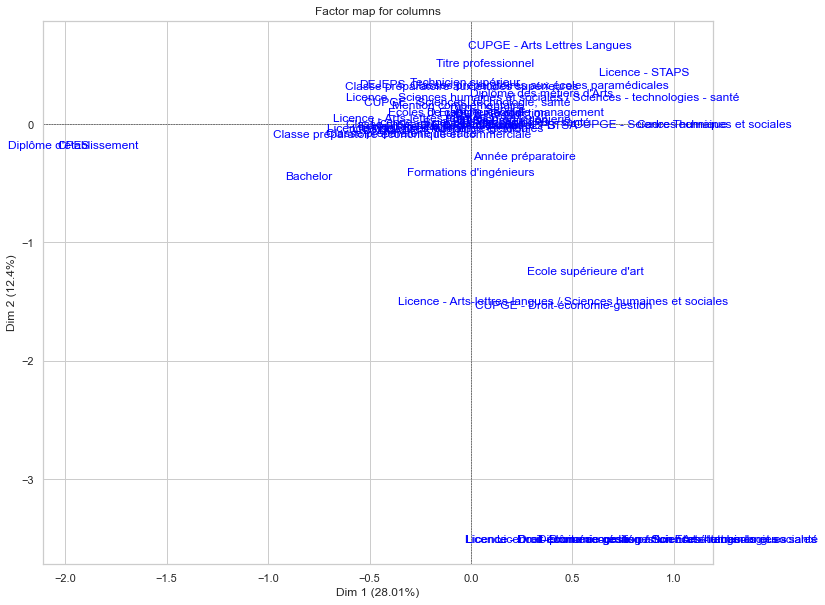

In [86]:
# Mapping des points colonnes
res_ca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

#### les lignes

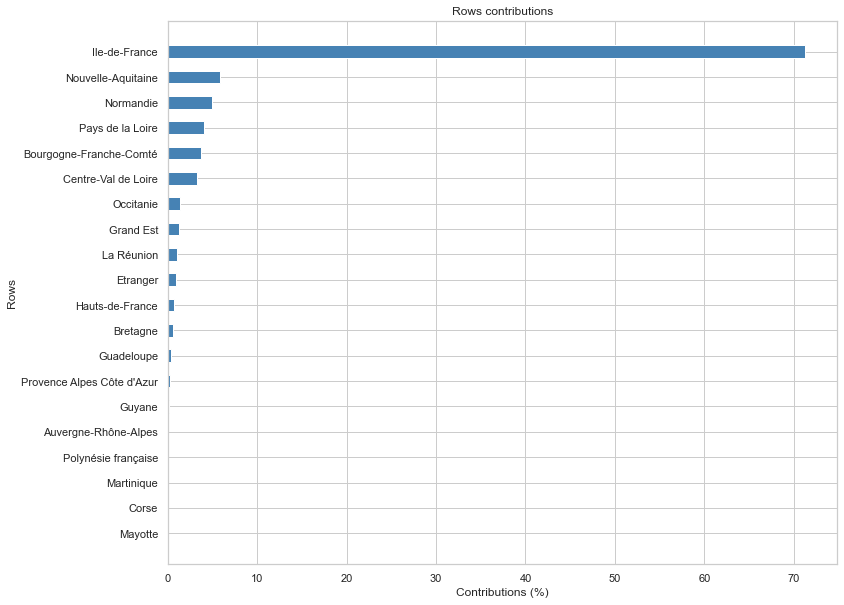

In [87]:
#Analyse du 1er axe - Points lignes
#Classement des points lignes en fonction de leur contribution au 1er axe
res_ca.plot_row_contrib(num_axis=1,figsize=(12, 10))

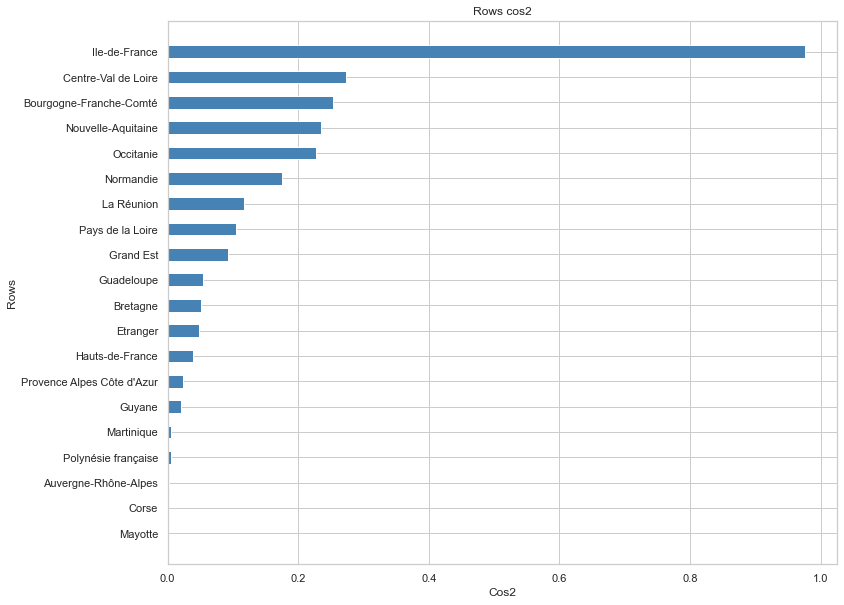

In [88]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
res_ca.plot_row_cos2(num_axis=1,figsize=(12, 10))

#### les colonnes

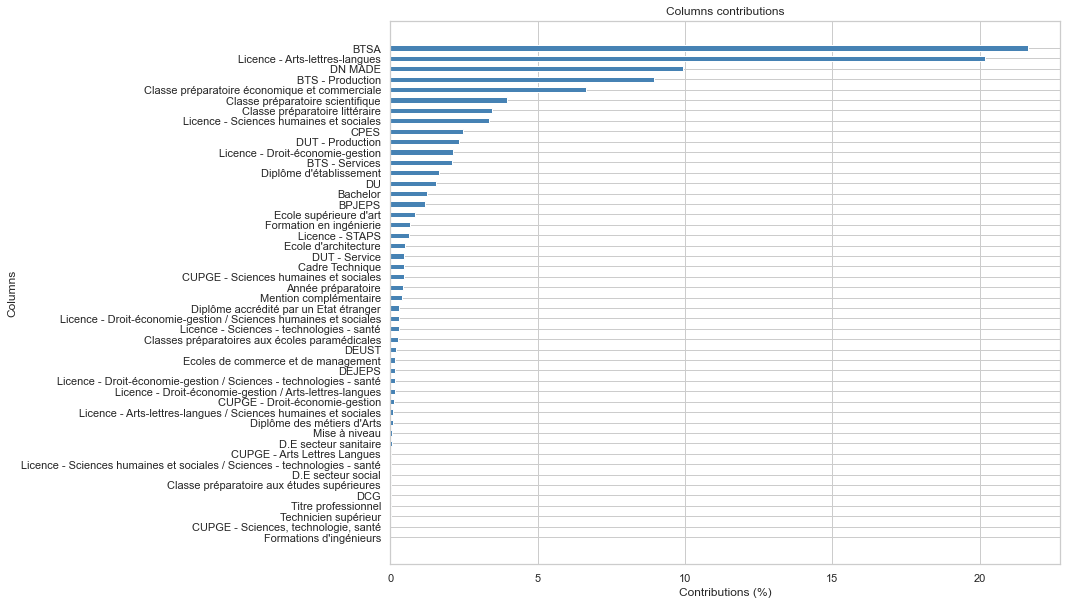

In [89]:
#Analyse du 1er axe - Points colonnes
# Classement des points colonnes en fonction de leur contribution au 1er axe
res_ca.plot_col_contrib(num_axis=1,figsize=(12, 10))

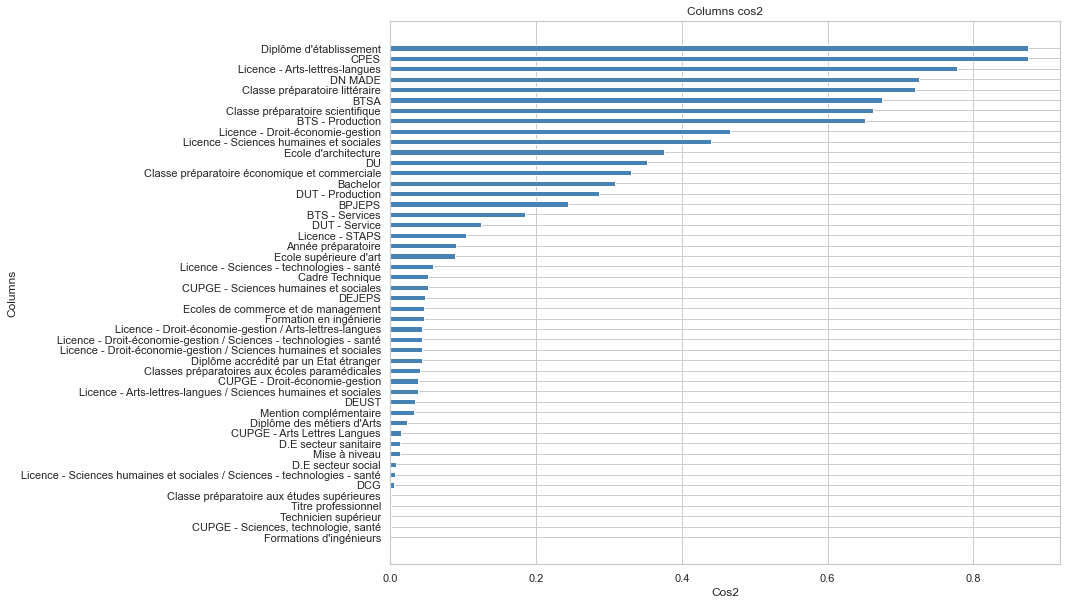

In [90]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
res_ca.plot_col_cos2(num_axis=1,figsize=(12, 10))

### Regression quanti   2019

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn import metrics
from fanalysis.pca import PCA

In [92]:
df_resu.tail(5)

Capacité de létablissement par formation  \
Établissement                                                                                   
lycée Georges BRIERE                                                                     81.0   
sup SOCIAL - Les Etablières                                                              44.0   
École Nationale des Techniciens de l'Équipement...                                       30.0   
École Nationale des Techniciens de l'Équipement...                                       30.0   
École Supérieure d'Art du Nord-Pas de Calais : ...                                       78.0   

                                                    Effectif total des candidats pour une formation  \
Établissement                                                                                         
lycée Georges BRIERE                                                                            827   
sup SOCIAL - Les Etablières                                                                     495   
École Nationale des Techniciens de l'Équipement...                                               56   
École Nationale des Techniciens de l'Équipement...                                               90   
École Supérieure d'Art du Nord-Pas de Calais : ...                                              303   

                                                    Dont effectif des candidates pour une formation  \
Établissement                                                                                         
lycée Georges BRIERE                                                                            123   
sup SOCIAL - Les Etablières                                                                     436   
École Nationale des Techniciens de l'Équipement...                                               16   
École Nationale des Techniciens de l'Équipement...                                               22   
École Supérieure d'Art du Nord-Pas de Calais : ...                                              202   

                                                    Effectif total des candidats en phase principale  
Établissement                                                                                         
lycée Georges BRIERE                                                                             778  
sup SOCIAL - Les Etablières                                                                      436  
École Nationale des Techniciens de l'Équipement...                                                47  
École Nationale des Techniciens de l'Équipement...                                                61  
École Supérieure d'Art du Nord-Pas de Calais : ...                                               184

In [93]:
# préparation des données pour l'ACP
#dfresu_2018 = dfresu_2018.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_resu.values[:,1:4]
target=df_resu.values[:,0]
features = df_resu.columns
names=df_resu.index

In [94]:
target

array([65., 42., 50., ..., 30., 30., 78.])

In [95]:
X

array([[1863.,  321., 1855.],
       [ 527.,  473.,  527.],
       [ 282.,  236.,  282.],
       ...,
       [  56.,   16.,   47.],
       [  90.,   22.,   61.],
       [ 303.,  202.,  184.]])

In [96]:
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target,test_size=0.3,random_state=0) 

In [97]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

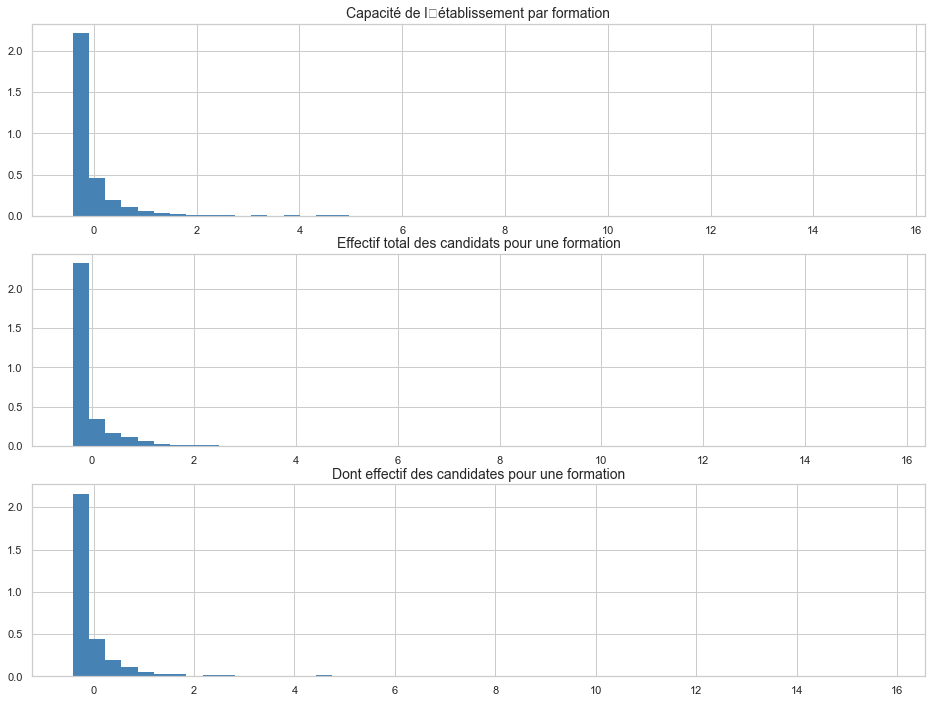

In [98]:
fig = plt.figure(figsize=(16, 12))
for col in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,1, (col+1))
    h = ax.hist(X_train_std[:, col], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(features[col], fontsize=14)

In [99]:
y_train= y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)

In [100]:
model =LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5890162975075744

## Comparaison

In [101]:
# une Analyse en Composantes Prnicipales (4 axes retenus) puis une régression linéaire multiple
pipe = Pipeline([("pca", PCA(n_components=4, stats=False)), ("linear_regression", LinearRegression())])

# sans transformation des données
model =LinearRegression()

In [102]:
dictionnaire_modele = {'PCA_Regression' : pipe,  'regression':model }

In [103]:
def evaluation(model):
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print(' ')
    y_pred= model.predict(X_test)
    y_pred= y_pred.reshape(-1,1)
    
    print('SCORE:',model.score(X_test, y_test))
    print(' ')
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print(' ')
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print(' ')
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("\n")
    
    plt.figure(figsize=(15,8))
    plt.scatter(X_test[:,1],y_test)
    plt.scatter(X_test[:,1],y_pred,c='r')
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.plot(y_test,label ='Test')
    plt.plot(y_pred, label = 'predict')
    plt.show()

PCA_Regression
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
SCORE: 0.5890162975075741
 
MAE: 137.59266071500727
 
MSE: 269025.2468170589
 
RMSE: 518.6764374993902




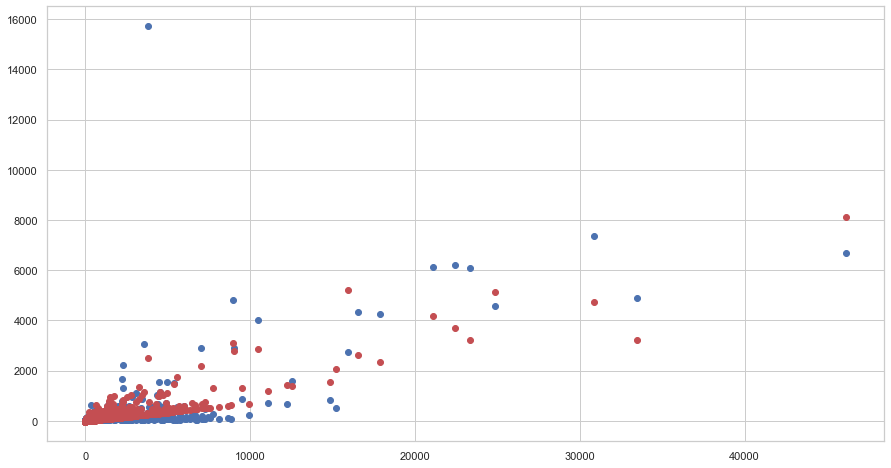

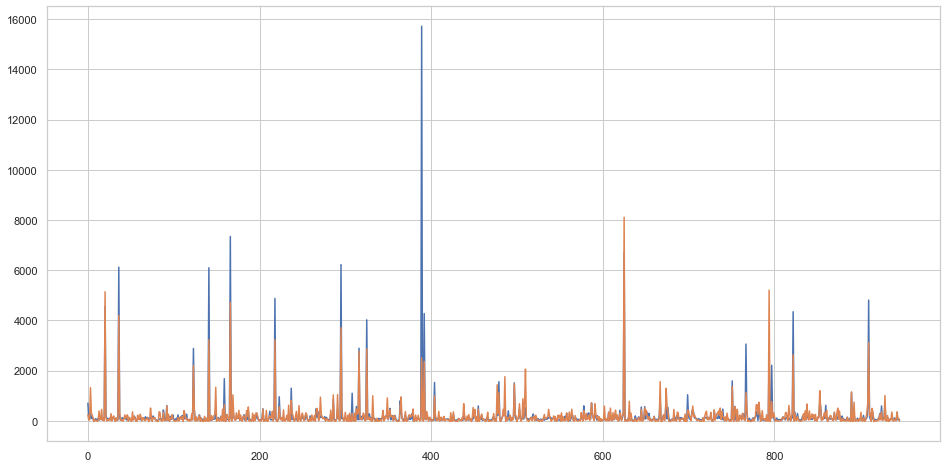

regression
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
SCORE: 0.5890162975075744
 
MAE: 137.5926607150078
 
MSE: 269025.2468170587
 
RMSE: 518.6764374993901




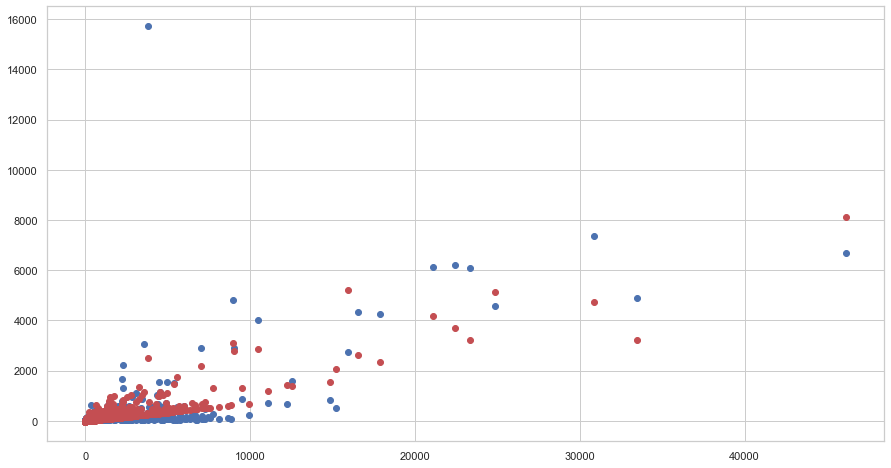

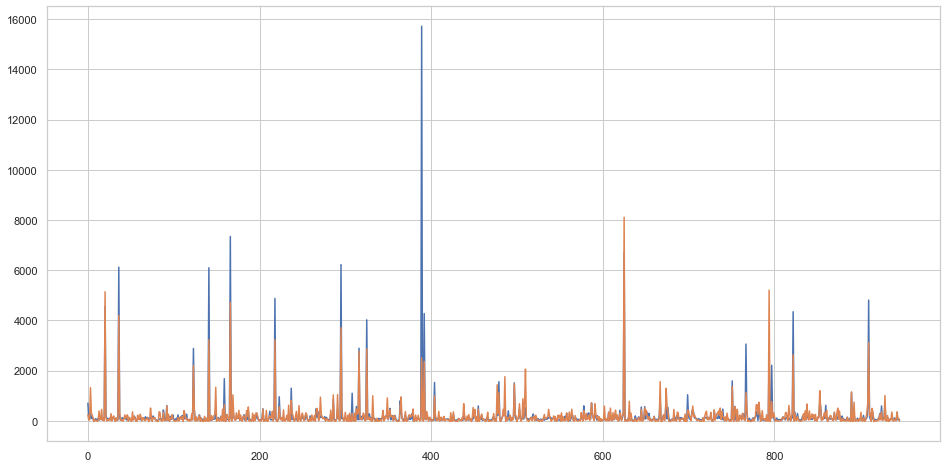

In [104]:
for name, model in dictionnaire_modele.items():
    print(name)
    evaluation(model) 

### Optimisatio du modèle 2019

In [105]:
param = [{"pca__n_components": [x + 1 for x in range(4)]}]

In [106]:
pipe = Pipeline([("pca", PCA(stats=False)), ("linear_regression", LinearRegression())])

In [107]:
grid_search = GridSearchCV(pipe, param_grid=param, scoring="neg_mean_squared_error")

In [108]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(stats=False)),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid=[{'pca__n_components': [1, 2, 3, 4]}],
             scoring='neg_mean_squared_error')

In [109]:
print("score optimal : ",grid_search.best_score_)
print(" ")
print("RMSE optimal : ",np.sqrt(-grid_search.best_score_))
print(" ")
print("paramètre optimal : ",grid_search.best_params_)

score optimal :  -176147.08003508011
 
RMSE optimal :  419.69879679965743
 
paramètre optimal :  {'pca__n_components': 3}


In [110]:
grid_search.predict(X_test).reshape(-1,1)

array([[ 2.41780463e+02],
       [ 3.79802054e+01],
       [ 3.70254675e+01],
       [ 1.32189254e+03],
       [ 3.16609819e+02],
       [ 2.29408416e+02],
       [ 1.12156838e+02],
       [-2.72575362e+01],
       [ 3.09821443e+01],
       [ 2.99586253e+01],
       [ 4.50708262e+00],
       [-2.18961413e+01],
       [ 2.91291312e+01],
       [ 3.93111092e+02],
       [ 5.60884294e+01],
       [ 7.29930878e+01],
       [ 4.56979596e+02],
       [ 1.80273452e+01],
       [ 9.78166085e+01],
       [ 2.22175864e+00],
       [ 5.14187687e+03],
       [ 1.26727058e+02],
       [-6.73299690e+00],
       [ 2.97887366e+01],
       [ 1.61844496e+01],
       [ 8.33469294e+01],
       [ 2.64894369e+01],
       [ 2.87292192e+02],
       [-2.48301065e+00],
       [ 1.26726451e+02],
       [ 1.95983325e+02],
       [ 6.47906641e+01],
       [-2.23821651e+01],
       [ 1.17180766e+02],
       [ 2.73163461e+01],
       [ 4.02766160e+01],
       [ 4.19456606e+03],
       [ 3.24313925e+02],
       [ 3.7

In [111]:
def graph():
    grid_search.fit(X_train, y_train)
    grid_search.score(X_test, y_test)
    y_pred= grid_search.predict(X_test)
    y_pred= y_pred.reshape(-1,1)
    
    plt.figure(figsize=(15,8))
    plt.scatter(X_test[:,1],y_test)
    plt.scatter(X_test[:,1],y_pred,c='r')
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.plot(y_test,label ='Test')
    plt.plot(y_pred, label = 'predict')
    plt.show()

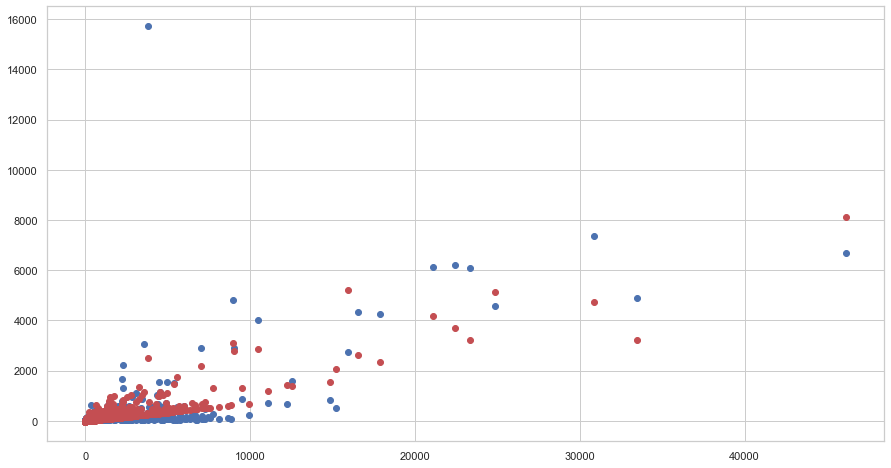

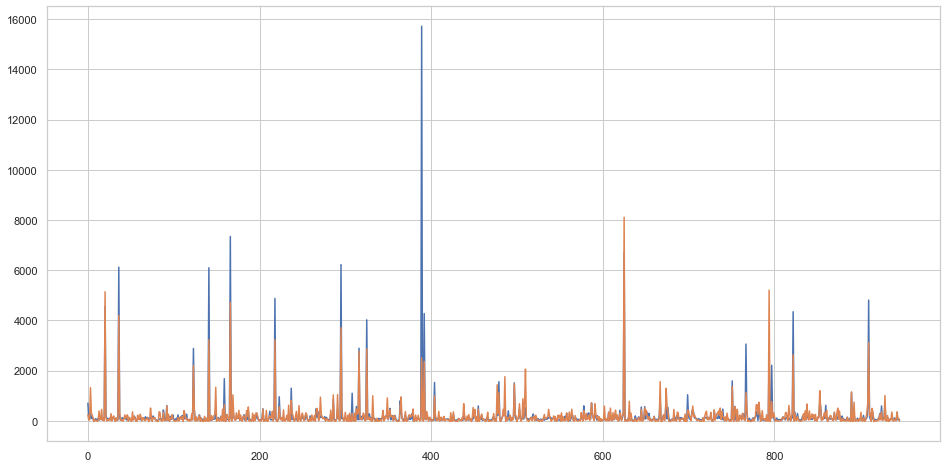

In [112]:
graph()